In [1]:
# Mixed new and old data

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, concatenate, Conv2DTranspose
#from keras.utils.vis_utils import plot_model
import keras.backend as K
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import numpy as np
import random
from tensorflow.keras.models import load_model
# Set the random seeds for reproducibility
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)






def build_unet(input_shape,input_shape2, seed_value=42):
    
    
    # Create separate input layers for the three inputs
    input_low_geometry = Input(shape=input_shape, name='low_geometry_input')
    input_low_stream = Input(shape=input_shape2, name='low_stream_input')
    input_low_pressure = Input(shape=input_shape2, name='low_pressure_input')

    # Concatenate the three input layers to create a single input
    concatenated_input = concatenate([input_low_geometry, input_low_stream,input_low_pressure], axis=-1)
   

    # Contracting path
    conv1 = Conv2D(64, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(concatenated_input )
    conv1 = Conv2D(64, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(1024, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv5)

    # Expanding path
    up6 = Conv2DTranspose(512, 2, strides=(2, 2), padding='same')(conv5)
    up6 = concatenate([up6, conv4])
    conv6 = Conv2D(512, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(up6)
    conv6 = Conv2D(512, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv6)

    up7 = Conv2DTranspose(256, 2, strides=(2, 2), padding='same')(conv6)
    up7 = concatenate([up7, conv3])
    conv7 = Conv2D(256, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(up7)
    conv7 = Conv2D(256, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv7)

    up8 = Conv2DTranspose(128, 2, strides=(2, 2), padding='same')(conv7)
    up8 = concatenate([up8, conv2])
    conv8 = Conv2D(128, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(up8)
    conv8 = Conv2D(128, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv8)

    up9 = Conv2DTranspose(64, 2, strides=(2, 2), padding='same')(conv8)
    up9 = concatenate([up9, conv1])
    conv9 = Conv2D(64, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(up9)
    conv9 = Conv2D(64, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv9)
    
    
    
    
    conv10 = Conv2D(64, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv9 )
    conv10 = Conv2D(64, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv10)
    pool10 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv20 = Conv2D(128, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(pool10)
    conv20 = Conv2D(128, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv20)
    pool20 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv30 = Conv2D(256, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(pool20)
    conv30 = Conv2D(256, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv30)
    pool30 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv40 = Conv2D(512, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(pool30)
    conv40 = Conv2D(512, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv40)
    pool40 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv50 = Conv2D(1024, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(pool40)
    conv50 = Conv2D(1024, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv50)

    # Expanding path
    up60 = Conv2DTranspose(512, 2, strides=(2, 2), padding='same')(conv5)
    up60 = concatenate([up60, conv40])
    conv60 = Conv2D(512, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(up60)
    conv60 = Conv2D(512, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv60)

    up70 = Conv2DTranspose(256, 2, strides=(2, 2), padding='same')(conv6)
    up70 = concatenate([up70, conv30])
    conv70 = Conv2D(256, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(up70)
    conv70 = Conv2D(256, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv70)

    up80 = Conv2DTranspose(128, 2, strides=(2, 2), padding='same')(conv7)
    up80 = concatenate([up80, conv20])
    conv80 = Conv2D(128, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(up80)
    conv80 = Conv2D(128, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv80)

    up90 = Conv2DTranspose(64, 2, strides=(2, 2), padding='same')(conv8)
    up90 = concatenate([up90, conv10])
    conv90 = Conv2D(64, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(up90)
    conv90 = Conv2D(64, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv90)    
    
    
    
    conv100 = Conv2D(64, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv90 )
    conv100 = Conv2D(64, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv100)
    pool100 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv200 = Conv2D(128, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(pool100)
    conv200 = Conv2D(128, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv200)
    pool200 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv300 = Conv2D(256, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(pool200)
    conv300 = Conv2D(256, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv300)
    pool300 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv400 = Conv2D(512, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(pool300)
    conv400 = Conv2D(512, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv400)
    pool400 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv500 = Conv2D(1024, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(pool400)
    conv500 = Conv2D(1024, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv500)

    # Expanding path
    up600 = Conv2DTranspose(512, 2, strides=(2, 2), padding='same')(conv5)
    up600 = concatenate([up600, conv400])
    conv600 = Conv2D(512, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(up600)
    conv600 = Conv2D(512, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv600)

    up700 = Conv2DTranspose(256, 2, strides=(2, 2), padding='same')(conv6)
    up700 = concatenate([up700, conv300])
    conv700 = Conv2D(256, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(up700)
    conv700 = Conv2D(256, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv700)

    up800 = Conv2DTranspose(128, 2, strides=(2, 2), padding='same')(conv7)
    up800 = concatenate([up800, conv200])
    conv800 = Conv2D(128, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(up800)
    conv800 = Conv2D(128, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv800)

    up900 = Conv2DTranspose(64, 2, strides=(2, 2), padding='same')(conv8)
    up900 = concatenate([up900, conv100])
    up900 = concatenate([up900, conv90])
    up900 = concatenate([up900, conv9])
    conv900 = Conv2D(64, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(up900)
    conv900 = Conv2D(64, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv900)
    conv900 = Conv2D(64, 3, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), padding='same')(conv900)
    
    # Velocity output layer
    velocity_outputs = Conv2D(1, 1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), name='velocity_output')(conv900)

    # Pressure output layer
    pressure_outputs = Conv2D(1, 1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value), name='pressure_output')(conv900)

    model = Model(inputs=[input_low_geometry,input_low_stream,input_low_pressure], outputs=[pressure_outputs, velocity_outputs])
    return model




def data_loss(y_true, y_pred):
    y_true = tf.expand_dims(y_true, axis=-1)
    y_pred = tf.expand_dims(y_pred, axis=-1)
    d_loss = tf.reduce_mean(tf.square(y_true - y_pred))
    return d_loss









     


# Read the dataset
import os
import numpy as np
from PIL import Image
from keras.callbacks import ModelCheckpoint

# Set the paths to the data folders


lv_folder = 'Low/LVV-new'
hv_folder = 'High/HVV'
lp_folder = 'Low/LPP-new'
hp_folder = 'High/HPP'
lg_folder = 'LG-3C'

# Get the list of file names in each folder
lv_files = [f for f in os.listdir(lv_folder) if f != ".ipynb_checkpoints"]
hv_files = [f for f in os.listdir(hv_folder) if f != ".ipynb_checkpoints"]
lp_files = [f for f in os.listdir(lp_folder) if f != ".ipynb_checkpoints"]
hp_files = [f for f in os.listdir(hp_folder) if f != ".ipynb_checkpoints"]
lg_files = [f for f in os.listdir(lg_folder) if f != ".ipynb_checkpoints"]

# Sort the file names to ensure the order is consistent
lv_files.sort()
hv_files.sort()
lp_files.sort()
hp_files.sort()
lg_files.sort()


# Set the input shape
input_shape = (256, 256, 3)  # Update to 3 channels for color images
input_shape2 = (256, 256, 1)

# Create empty lists to store the data
X_lv = []
X_lp = []
X_lg = []
Y_hv = []
Y_hp = []

# Read the data from the folders
for lv_file, hv_file,lp_file,hp_file,lg_file in zip(lv_files, hv_files,lp_files,hp_files,lg_files):
    try:
        
        # Read the LFV
        lv_image = np.load(os.path.join(lv_folder, lv_file))  # Convert to RGB
        X_lv.append(np.array(lv_image))
        
        # Read the HFV
        hv_image = np.load(os.path.join(hv_folder, hv_file))  # Convert to RGB
        Y_hv.append(np.array(hv_image))

        # Read the LFP
        lp_image = np.load(os.path.join(lp_folder, lp_file))  # Convert to RGB
        X_lp.append(np.array(lp_image))
    
    
        # Read the channel geometry image
        lg_image = Image.open(os.path.join(lg_folder, lg_file)).convert('RGB')  # Convert to RGB
        lg_image = lg_image.resize(input_shape[:2])  # Resize the image
        X_lg.append(np.array(lg_image))
    
        # Read the HFP
        hp_image = np.load(os.path.join(hp_folder, hp_file))  # Convert to RGB
        Y_hp.append(np.array(hp_image))
    except:
        print('')

        
        
# Convert the lists to arrays
X_lv = np.array(X_lv) 
X_lp = np.array(X_lp) 
X_lg = np.array(X_lg) / 255.0  # Normalize the channel geometry images
Y_hv = np.array(Y_hv)
Y_hp = np.array(Y_hp)




X_lp[np.isnan(X_lp)] = 0
X_lv[np.isnan(X_lv)] = 0
Y_hp[np.isnan(Y_hp)] = 0
Y_hv[np.isnan(Y_hv)] = 0

Y_hpt=(Y_hp-np.min(Y_hp))/(np.max(Y_hp)-np.min(Y_hp))
X_lpt=(X_lp-np.min(X_lp))/(np.max(X_lp)-np.min(X_lp))




# Build the U-Net model
model = build_unet(input_shape,input_shape2)



optim = Adam(learning_rate=0.00001)
# Compile the model with the desired loss functions
model.compile(optimizer=optim,
              loss=[data_loss,data_loss])
# Set up checkpoints to save the best model during training
checkpoint_path = 'Saved_Models_Temp/Final-Data-proposed-3-Inputs.h5'
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# Train the model
epochs = 2400
batch_size = 16
print('start fitting')
model.fit([X_lg,X_lv,X_lpt], [Y_hpt, Y_hv],
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2,
          callbacks=[checkpoint])


2025-03-23 16:27:49.054863: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2025-03-23 16:27:49.054899: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 96.00 GB
2025-03-23 16:27:49.054908: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 36.00 GB
2025-03-23 16:27:49.054939: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-03-23 16:27:49.054952: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


start fitting
Epoch 1/2400


2025-03-23 16:27:56.357394: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


142/142 [==============================] - ETA: 0s - loss: 0.1847 - pressure_output_loss: 0.0686 - velocity_output_loss: 0.1161

2025-03-23 16:30:09.728723: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_loss improved from inf to 0.01731, saving model to Saved_Models/Final-Data-proposed-3-Inputs.h5


/Users/trina-mrd-lab2/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


142/142 [==============================] - 143s 980ms/step - loss: 0.1847 - pressure_output_loss: 0.0686 - velocity_output_loss: 0.1161 - val_loss: 0.0173 - val_pressure_output_loss: 0.0165 - val_velocity_output_loss: 7.9780e-04
Epoch 2/2400
142/142 [==============================] - ETA: 0s - loss: 0.0234 - pressure_output_loss: 0.0209 - velocity_output_loss: 0.0025
Epoch 2: val_loss improved from 0.01731 to 0.01715, saving model to Saved_Models/Final-Data-proposed-3-Inputs.h5
142/142 [==============================] - 136s 960ms/step - loss: 0.0234 - pressure_output_loss: 0.0209 - velocity_output_loss: 0.0025 - val_loss: 0.0171 - val_pressure_output_loss: 0.0166 - val_velocity_output_loss: 5.7392e-04
Epoch 3/2400
142/142 [==============================] - ETA: 0s - loss: 0.0233 - pressure_output_loss: 0.0209 - velocity_output_loss: 0.0025
Epoch 3: val_loss improved from 0.01715 to 0.01711, saving model to Saved_Models/Final-Data-proposed-3-Inputs.h5
142/142 [=========================

Epoch 19/2400
142/142 [==============================] - ETA: 0s - loss: 0.0014 - pressure_output_loss: 4.3745e-04 - velocity_output_loss: 9.4251e-04
Epoch 19: val_loss improved from 0.00047 to 0.00042, saving model to Saved_Models/Final-Data-proposed-3-Inputs.h5
142/142 [==============================] - 150s 1s/step - loss: 0.0014 - pressure_output_loss: 4.3745e-04 - velocity_output_loss: 9.4251e-04 - val_loss: 4.2475e-04 - val_pressure_output_loss: 1.9544e-04 - val_velocity_output_loss: 2.2931e-04
Epoch 20/2400
142/142 [==============================] - ETA: 0s - loss: 0.0013 - pressure_output_loss: 4.0000e-04 - velocity_output_loss: 8.5122e-04
Epoch 20: val_loss improved from 0.00042 to 0.00038, saving model to Saved_Models/Final-Data-proposed-3-Inputs.h5
142/142 [==============================] - 149s 1s/step - loss: 0.0013 - pressure_output_loss: 4.0000e-04 - velocity_output_loss: 8.5122e-04 - val_loss: 3.8123e-04 - val_pressure_output_loss: 1.9689e-04 - val_velocity_output_loss:

142/142 [==============================] - ETA: 0s - loss: 7.7245e-04 - pressure_output_loss: 2.0349e-04 - velocity_output_loss: 5.6896e-04
Epoch 53: val_loss did not improve from 0.00015
142/142 [==============================] - 149s 1s/step - loss: 7.7245e-04 - pressure_output_loss: 2.0349e-04 - velocity_output_loss: 5.6896e-04 - val_loss: 2.4433e-04 - val_pressure_output_loss: 1.3034e-04 - val_velocity_output_loss: 1.1399e-04
Epoch 54/2400
142/142 [==============================] - ETA: 0s - loss: 7.7879e-04 - pressure_output_loss: 2.0995e-04 - velocity_output_loss: 5.6884e-04
Epoch 54: val_loss improved from 0.00015 to 0.00015, saving model to Saved_Models/Final-Data-proposed-3-Inputs.h5
142/142 [==============================] - 150s 1s/step - loss: 7.7879e-04 - pressure_output_loss: 2.0995e-04 - velocity_output_loss: 5.6884e-04 - val_loss: 1.4912e-04 - val_pressure_output_loss: 4.1703e-05 - val_velocity_output_loss: 1.0742e-04
Epoch 55/2400
142/142 [=============================

Epoch 71/2400
142/142 [==============================] - ETA: 0s - loss: 6.8937e-04 - pressure_output_loss: 1.6571e-04 - velocity_output_loss: 5.2367e-04
Epoch 71: val_loss did not improve from 0.00013
142/142 [==============================] - 156s 1s/step - loss: 6.8937e-04 - pressure_output_loss: 1.6571e-04 - velocity_output_loss: 5.2367e-04 - val_loss: 1.3701e-04 - val_pressure_output_loss: 3.6813e-05 - val_velocity_output_loss: 1.0020e-04
Epoch 72/2400
142/142 [==============================] - ETA: 0s - loss: 6.8856e-04 - pressure_output_loss: 1.6545e-04 - velocity_output_loss: 5.2310e-04
Epoch 72: val_loss did not improve from 0.00013
142/142 [==============================] - 153s 1s/step - loss: 6.8856e-04 - pressure_output_loss: 1.6545e-04 - velocity_output_loss: 5.2310e-04 - val_loss: 1.3508e-04 - val_pressure_output_loss: 3.3579e-05 - val_velocity_output_loss: 1.0150e-04
Epoch 73/2400
142/142 [==============================] - ETA: 0s - loss: 6.8072e-04 - pressure_output_lo

Epoch 89/2400
142/142 [==============================] - ETA: 0s - loss: 6.4265e-04 - pressure_output_loss: 1.4425e-04 - velocity_output_loss: 4.9840e-04
Epoch 89: val_loss did not improve from 0.00013
142/142 [==============================] - 149s 1s/step - loss: 6.4265e-04 - pressure_output_loss: 1.4425e-04 - velocity_output_loss: 4.9840e-04 - val_loss: 1.3240e-04 - val_pressure_output_loss: 3.7300e-05 - val_velocity_output_loss: 9.5097e-05
Epoch 90/2400
142/142 [==============================] - ETA: 0s - loss: 6.4313e-04 - pressure_output_loss: 1.4586e-04 - velocity_output_loss: 4.9728e-04
Epoch 90: val_loss did not improve from 0.00013
142/142 [==============================] - 151s 1s/step - loss: 6.4313e-04 - pressure_output_loss: 1.4586e-04 - velocity_output_loss: 4.9728e-04 - val_loss: 1.3327e-04 - val_pressure_output_loss: 3.8262e-05 - val_velocity_output_loss: 9.5010e-05
Epoch 91/2400
142/142 [==============================] - ETA: 0s - loss: 6.5013e-04 - pressure_output_lo

Epoch 107/2400
142/142 [==============================] - ETA: 0s - loss: 6.1852e-04 - pressure_output_loss: 1.3633e-04 - velocity_output_loss: 4.8219e-04
Epoch 107: val_loss did not improve from 0.00012
142/142 [==============================] - 153s 1s/step - loss: 6.1852e-04 - pressure_output_loss: 1.3633e-04 - velocity_output_loss: 4.8219e-04 - val_loss: 1.2511e-04 - val_pressure_output_loss: 3.3360e-05 - val_velocity_output_loss: 9.1745e-05
Epoch 108/2400
142/142 [==============================] - ETA: 0s - loss: 6.2152e-04 - pressure_output_loss: 1.3922e-04 - velocity_output_loss: 4.8229e-04
Epoch 108: val_loss improved from 0.00012 to 0.00012, saving model to Saved_Models/Final-Data-proposed-3-Inputs.h5
142/142 [==============================] - 152s 1s/step - loss: 6.2152e-04 - pressure_output_loss: 1.3922e-04 - velocity_output_loss: 4.8229e-04 - val_loss: 1.2031e-04 - val_pressure_output_loss: 2.9119e-05 - val_velocity_output_loss: 9.1193e-05
Epoch 109/2400
142/142 [==========

Epoch 125/2400
142/142 [==============================] - ETA: 0s - loss: 6.0344e-04 - pressure_output_loss: 1.3136e-04 - velocity_output_loss: 4.7208e-04
Epoch 125: val_loss improved from 0.00012 to 0.00012, saving model to Saved_Models/Final-Data-proposed-3-Inputs.h5
142/142 [==============================] - 150s 1s/step - loss: 6.0344e-04 - pressure_output_loss: 1.3136e-04 - velocity_output_loss: 4.7208e-04 - val_loss: 1.1654e-04 - val_pressure_output_loss: 2.7456e-05 - val_velocity_output_loss: 8.9084e-05
Epoch 126/2400
142/142 [==============================] - ETA: 0s - loss: 5.9755e-04 - pressure_output_loss: 1.2853e-04 - velocity_output_loss: 4.6903e-04
Epoch 126: val_loss did not improve from 0.00012
142/142 [==============================] - 148s 1s/step - loss: 5.9755e-04 - pressure_output_loss: 1.2853e-04 - velocity_output_loss: 4.6903e-04 - val_loss: 1.2048e-04 - val_pressure_output_loss: 3.0753e-05 - val_velocity_output_loss: 8.9731e-05
Epoch 127/2400
142/142 [==========

Epoch 143/2400
142/142 [==============================] - ETA: 0s - loss: 5.7756e-04 - pressure_output_loss: 1.2140e-04 - velocity_output_loss: 4.5616e-04
Epoch 143: val_loss did not improve from 0.00011
142/142 [==============================] - 158s 1s/step - loss: 5.7756e-04 - pressure_output_loss: 1.2140e-04 - velocity_output_loss: 4.5616e-04 - val_loss: 1.3076e-04 - val_pressure_output_loss: 2.6747e-05 - val_velocity_output_loss: 1.0402e-04
Epoch 144/2400
142/142 [==============================] - ETA: 0s - loss: 5.7621e-04 - pressure_output_loss: 1.2197e-04 - velocity_output_loss: 4.5424e-04
Epoch 144: val_loss did not improve from 0.00011
142/142 [==============================] - 154s 1s/step - loss: 5.7621e-04 - pressure_output_loss: 1.2197e-04 - velocity_output_loss: 4.5424e-04 - val_loss: 1.1397e-04 - val_pressure_output_loss: 2.7019e-05 - val_velocity_output_loss: 8.6947e-05
Epoch 145/2400
142/142 [==============================] - ETA: 0s - loss: 5.6726e-04 - pressure_outp

Epoch 161/2400
142/142 [==============================] - ETA: 0s - loss: 5.0559e-04 - pressure_output_loss: 1.1674e-04 - velocity_output_loss: 3.8885e-04
Epoch 161: val_loss did not improve from 0.00010
142/142 [==============================] - 151s 1s/step - loss: 5.0559e-04 - pressure_output_loss: 1.1674e-04 - velocity_output_loss: 3.8885e-04 - val_loss: 1.2635e-04 - val_pressure_output_loss: 4.3325e-05 - val_velocity_output_loss: 8.3021e-05
Epoch 162/2400
142/142 [==============================] - ETA: 0s - loss: 5.0952e-04 - pressure_output_loss: 1.1957e-04 - velocity_output_loss: 3.8995e-04
Epoch 162: val_loss improved from 0.00010 to 0.00010, saving model to Saved_Models/Final-Data-proposed-3-Inputs.h5
142/142 [==============================] - 151s 1s/step - loss: 5.0952e-04 - pressure_output_loss: 1.1957e-04 - velocity_output_loss: 3.8995e-04 - val_loss: 9.9878e-05 - val_pressure_output_loss: 2.5013e-05 - val_velocity_output_loss: 7.4866e-05
Epoch 163/2400
142/142 [==========

Epoch 179/2400
142/142 [==============================] - ETA: 0s - loss: 4.3786e-04 - pressure_output_loss: 1.1016e-04 - velocity_output_loss: 3.2770e-04
Epoch 179: val_loss did not improve from 0.00009
142/142 [==============================] - 156s 1s/step - loss: 4.3786e-04 - pressure_output_loss: 1.1016e-04 - velocity_output_loss: 3.2770e-04 - val_loss: 1.0413e-04 - val_pressure_output_loss: 3.8424e-05 - val_velocity_output_loss: 6.5704e-05
Epoch 180/2400
142/142 [==============================] - ETA: 0s - loss: 4.3878e-04 - pressure_output_loss: 1.1063e-04 - velocity_output_loss: 3.2815e-04
Epoch 180: val_loss improved from 0.00009 to 0.00009, saving model to Saved_Models/Final-Data-proposed-3-Inputs.h5
142/142 [==============================] - 157s 1s/step - loss: 4.3878e-04 - pressure_output_loss: 1.1063e-04 - velocity_output_loss: 3.2815e-04 - val_loss: 9.0605e-05 - val_pressure_output_loss: 2.7808e-05 - val_velocity_output_loss: 6.2798e-05
Epoch 181/2400
142/142 [==========

Epoch 214/2400
142/142 [==============================] - ETA: 0s - loss: 3.7055e-04 - pressure_output_loss: 9.7091e-05 - velocity_output_loss: 2.7346e-04
Epoch 214: val_loss improved from 0.00008 to 0.00008, saving model to Saved_Models/Final-Data-proposed-3-Inputs.h5
142/142 [==============================] - 150s 1s/step - loss: 3.7055e-04 - pressure_output_loss: 9.7091e-05 - velocity_output_loss: 2.7346e-04 - val_loss: 7.5851e-05 - val_pressure_output_loss: 2.1792e-05 - val_velocity_output_loss: 5.4059e-05
Epoch 215/2400
142/142 [==============================] - ETA: 0s - loss: 3.7080e-04 - pressure_output_loss: 9.8060e-05 - velocity_output_loss: 2.7274e-04
Epoch 215: val_loss improved from 0.00008 to 0.00007, saving model to Saved_Models/Final-Data-proposed-3-Inputs.h5
142/142 [==============================] - 150s 1s/step - loss: 3.7080e-04 - pressure_output_loss: 9.8060e-05 - velocity_output_loss: 2.7274e-04 - val_loss: 7.4553e-05 - val_pressure_output_loss: 2.2477e-05 - val_v

Epoch 232/2400
142/142 [==============================] - ETA: 0s - loss: 3.3744e-04 - pressure_output_loss: 9.0155e-05 - velocity_output_loss: 2.4728e-04
Epoch 232: val_loss did not improve from 0.00007
142/142 [==============================] - 157s 1s/step - loss: 3.3744e-04 - pressure_output_loss: 9.0155e-05 - velocity_output_loss: 2.4728e-04 - val_loss: 7.3059e-05 - val_pressure_output_loss: 2.2154e-05 - val_velocity_output_loss: 5.0905e-05
Epoch 233/2400
142/142 [==============================] - ETA: 0s - loss: 3.3693e-04 - pressure_output_loss: 9.0619e-05 - velocity_output_loss: 2.4631e-04
Epoch 233: val_loss did not improve from 0.00007
142/142 [==============================] - 154s 1s/step - loss: 3.3693e-04 - pressure_output_loss: 9.0619e-05 - velocity_output_loss: 2.4631e-04 - val_loss: 7.5641e-05 - val_pressure_output_loss: 2.4475e-05 - val_velocity_output_loss: 5.1165e-05
Epoch 234/2400
142/142 [==============================] - ETA: 0s - loss: 3.3949e-04 - pressure_outp

Epoch 250/2400
142/142 [==============================] - ETA: 0s - loss: 3.0893e-04 - pressure_output_loss: 8.4257e-05 - velocity_output_loss: 2.2467e-04
Epoch 250: val_loss did not improve from 0.00007
142/142 [==============================] - 150s 1s/step - loss: 3.0893e-04 - pressure_output_loss: 8.4257e-05 - velocity_output_loss: 2.2467e-04 - val_loss: 7.3575e-05 - val_pressure_output_loss: 2.2956e-05 - val_velocity_output_loss: 5.0619e-05
Epoch 251/2400
142/142 [==============================] - ETA: 0s - loss: 3.0040e-04 - pressure_output_loss: 8.3084e-05 - velocity_output_loss: 2.1732e-04
Epoch 251: val_loss did not improve from 0.00007
142/142 [==============================] - 150s 1s/step - loss: 3.0040e-04 - pressure_output_loss: 8.3084e-05 - velocity_output_loss: 2.1732e-04 - val_loss: 7.0207e-05 - val_pressure_output_loss: 2.2928e-05 - val_velocity_output_loss: 4.7279e-05
Epoch 252/2400
142/142 [==============================] - ETA: 0s - loss: 3.0859e-04 - pressure_outp

Epoch 268/2400
142/142 [==============================] - ETA: 0s - loss: 2.7087e-04 - pressure_output_loss: 7.6626e-05 - velocity_output_loss: 1.9424e-04
Epoch 268: val_loss improved from 0.00007 to 0.00007, saving model to Saved_Models/Final-Data-proposed-3-Inputs.h5
142/142 [==============================] - 157s 1s/step - loss: 2.7087e-04 - pressure_output_loss: 7.6626e-05 - velocity_output_loss: 1.9424e-04 - val_loss: 6.5239e-05 - val_pressure_output_loss: 2.1355e-05 - val_velocity_output_loss: 4.3884e-05
Epoch 269/2400
142/142 [==============================] - ETA: 0s - loss: 2.7286e-04 - pressure_output_loss: 7.7332e-05 - velocity_output_loss: 1.9552e-04
Epoch 269: val_loss improved from 0.00007 to 0.00006, saving model to Saved_Models/Final-Data-proposed-3-Inputs.h5
142/142 [==============================] - 155s 1s/step - loss: 2.7286e-04 - pressure_output_loss: 7.7332e-05 - velocity_output_loss: 1.9552e-04 - val_loss: 6.3955e-05 - val_pressure_output_loss: 2.0516e-05 - val_v

Epoch 286/2400
142/142 [==============================] - ETA: 0s - loss: 2.4381e-04 - pressure_output_loss: 6.7958e-05 - velocity_output_loss: 1.7585e-04
Epoch 286: val_loss did not improve from 0.00006
142/142 [==============================] - 151s 1s/step - loss: 2.4381e-04 - pressure_output_loss: 6.7958e-05 - velocity_output_loss: 1.7585e-04 - val_loss: 6.6207e-05 - val_pressure_output_loss: 2.4012e-05 - val_velocity_output_loss: 4.2195e-05
Epoch 287/2400
142/142 [==============================] - ETA: 0s - loss: 2.4111e-04 - pressure_output_loss: 6.7614e-05 - velocity_output_loss: 1.7350e-04
Epoch 287: val_loss did not improve from 0.00006
142/142 [==============================] - 151s 1s/step - loss: 2.4111e-04 - pressure_output_loss: 6.7614e-05 - velocity_output_loss: 1.7350e-04 - val_loss: 6.1663e-05 - val_pressure_output_loss: 2.1100e-05 - val_velocity_output_loss: 4.0564e-05
Epoch 288/2400
142/142 [==============================] - ETA: 0s - loss: 2.4662e-04 - pressure_outp

Epoch 304/2400
142/142 [==============================] - ETA: 0s - loss: 2.1986e-04 - pressure_output_loss: 6.1174e-05 - velocity_output_loss: 1.5868e-04
Epoch 304: val_loss improved from 0.00006 to 0.00006, saving model to Saved_Models/Final-Data-proposed-3-Inputs.h5
142/142 [==============================] - 150s 1s/step - loss: 2.1986e-04 - pressure_output_loss: 6.1174e-05 - velocity_output_loss: 1.5868e-04 - val_loss: 5.8533e-05 - val_pressure_output_loss: 2.1014e-05 - val_velocity_output_loss: 3.7518e-05
Epoch 305/2400
142/142 [==============================] - ETA: 0s - loss: 2.2141e-04 - pressure_output_loss: 6.2033e-05 - velocity_output_loss: 1.5938e-04
Epoch 305: val_loss did not improve from 0.00006
142/142 [==============================] - 150s 1s/step - loss: 2.2141e-04 - pressure_output_loss: 6.2033e-05 - velocity_output_loss: 1.5938e-04 - val_loss: 8.5476e-05 - val_pressure_output_loss: 3.8026e-05 - val_velocity_output_loss: 4.7450e-05
Epoch 306/2400
142/142 [==========

Epoch 322/2400
142/142 [==============================] - ETA: 0s - loss: 2.0266e-04 - pressure_output_loss: 5.7176e-05 - velocity_output_loss: 1.4548e-04
Epoch 322: val_loss did not improve from 0.00006
142/142 [==============================] - 151s 1s/step - loss: 2.0266e-04 - pressure_output_loss: 5.7176e-05 - velocity_output_loss: 1.4548e-04 - val_loss: 5.9571e-05 - val_pressure_output_loss: 1.9656e-05 - val_velocity_output_loss: 3.9914e-05
Epoch 323/2400
142/142 [==============================] - ETA: 0s - loss: 1.9964e-04 - pressure_output_loss: 5.5924e-05 - velocity_output_loss: 1.4372e-04
Epoch 323: val_loss did not improve from 0.00006
142/142 [==============================] - 151s 1s/step - loss: 1.9964e-04 - pressure_output_loss: 5.5924e-05 - velocity_output_loss: 1.4372e-04 - val_loss: 6.5605e-05 - val_pressure_output_loss: 2.5856e-05 - val_velocity_output_loss: 3.9749e-05
Epoch 324/2400
142/142 [==============================] - ETA: 0s - loss: 2.0235e-04 - pressure_outp

Epoch 340/2400
142/142 [==============================] - ETA: 0s - loss: 1.9385e-04 - pressure_output_loss: 5.8538e-05 - velocity_output_loss: 1.3531e-04
Epoch 340: val_loss did not improve from 0.00005
142/142 [==============================] - 150s 1s/step - loss: 1.9385e-04 - pressure_output_loss: 5.8538e-05 - velocity_output_loss: 1.3531e-04 - val_loss: 5.6397e-05 - val_pressure_output_loss: 2.2546e-05 - val_velocity_output_loss: 3.3850e-05
Epoch 341/2400
142/142 [==============================] - ETA: 0s - loss: 1.8771e-04 - pressure_output_loss: 5.4924e-05 - velocity_output_loss: 1.3278e-04
Epoch 341: val_loss did not improve from 0.00005
142/142 [==============================] - 155s 1s/step - loss: 1.8771e-04 - pressure_output_loss: 5.4924e-05 - velocity_output_loss: 1.3278e-04 - val_loss: 6.8453e-05 - val_pressure_output_loss: 3.3956e-05 - val_velocity_output_loss: 3.4497e-05
Epoch 342/2400
142/142 [==============================] - ETA: 0s - loss: 1.8535e-04 - pressure_outp

Epoch 376/2400
142/142 [==============================] - ETA: 0s - loss: 1.6689e-04 - pressure_output_loss: 5.3663e-05 - velocity_output_loss: 1.1323e-04
Epoch 376: val_loss did not improve from 0.00005
142/142 [==============================] - 156s 1s/step - loss: 1.6689e-04 - pressure_output_loss: 5.3663e-05 - velocity_output_loss: 1.1323e-04 - val_loss: 9.1167e-05 - val_pressure_output_loss: 3.6786e-05 - val_velocity_output_loss: 5.4381e-05
Epoch 377/2400
142/142 [==============================] - ETA: 0s - loss: 1.6508e-04 - pressure_output_loss: 5.0495e-05 - velocity_output_loss: 1.1458e-04
Epoch 377: val_loss improved from 0.00005 to 0.00005, saving model to Saved_Models/Final-Data-proposed-3-Inputs.h5
142/142 [==============================] - 154s 1s/step - loss: 1.6508e-04 - pressure_output_loss: 5.0495e-05 - velocity_output_loss: 1.1458e-04 - val_loss: 4.9567e-05 - val_pressure_output_loss: 1.9108e-05 - val_velocity_output_loss: 3.0458e-05
Epoch 378/2400
142/142 [==========

Epoch 394/2400
142/142 [==============================] - ETA: 0s - loss: 1.4942e-04 - pressure_output_loss: 4.7147e-05 - velocity_output_loss: 1.0227e-04
Epoch 394: val_loss did not improve from 0.00005
142/142 [==============================] - 150s 1s/step - loss: 1.4942e-04 - pressure_output_loss: 4.7147e-05 - velocity_output_loss: 1.0227e-04 - val_loss: 8.0351e-05 - val_pressure_output_loss: 4.7797e-05 - val_velocity_output_loss: 3.2554e-05
Epoch 395/2400
142/142 [==============================] - ETA: 0s - loss: 1.6750e-04 - pressure_output_loss: 5.5976e-05 - velocity_output_loss: 1.1153e-04
Epoch 395: val_loss did not improve from 0.00005
142/142 [==============================] - 150s 1s/step - loss: 1.6750e-04 - pressure_output_loss: 5.5976e-05 - velocity_output_loss: 1.1153e-04 - val_loss: 5.5625e-05 - val_pressure_output_loss: 2.5806e-05 - val_velocity_output_loss: 2.9818e-05
Epoch 396/2400
142/142 [==============================] - ETA: 0s - loss: 1.6776e-04 - pressure_outp

Epoch 430/2400
142/142 [==============================] - ETA: 0s - loss: 1.3636e-04 - pressure_output_loss: 4.3468e-05 - velocity_output_loss: 9.2896e-05
Epoch 430: val_loss did not improve from 0.00005
142/142 [==============================] - 152s 1s/step - loss: 1.3636e-04 - pressure_output_loss: 4.3468e-05 - velocity_output_loss: 9.2896e-05 - val_loss: 4.9198e-05 - val_pressure_output_loss: 1.8762e-05 - val_velocity_output_loss: 3.0436e-05
Epoch 431/2400
142/142 [==============================] - ETA: 0s - loss: 1.3643e-04 - pressure_output_loss: 4.4856e-05 - velocity_output_loss: 9.1573e-05
Epoch 431: val_loss did not improve from 0.00005
142/142 [==============================] - 152s 1s/step - loss: 1.3643e-04 - pressure_output_loss: 4.4856e-05 - velocity_output_loss: 9.1573e-05 - val_loss: 4.7235e-05 - val_pressure_output_loss: 1.9880e-05 - val_velocity_output_loss: 2.7354e-05
Epoch 432/2400
142/142 [==============================] - ETA: 0s - loss: 1.2151e-04 - pressure_outp

Epoch 448/2400
142/142 [==============================] - ETA: 0s - loss: 1.3794e-04 - pressure_output_loss: 4.5731e-05 - velocity_output_loss: 9.2210e-05
Epoch 448: val_loss did not improve from 0.00004
142/142 [==============================] - 152s 1s/step - loss: 1.3794e-04 - pressure_output_loss: 4.5731e-05 - velocity_output_loss: 9.2210e-05 - val_loss: 5.5252e-05 - val_pressure_output_loss: 2.8046e-05 - val_velocity_output_loss: 2.7206e-05
Epoch 449/2400
142/142 [==============================] - ETA: 0s - loss: 1.1848e-04 - pressure_output_loss: 3.8255e-05 - velocity_output_loss: 8.0225e-05
Epoch 449: val_loss did not improve from 0.00004
142/142 [==============================] - 157s 1s/step - loss: 1.1848e-04 - pressure_output_loss: 3.8255e-05 - velocity_output_loss: 8.0225e-05 - val_loss: 4.6611e-05 - val_pressure_output_loss: 1.9726e-05 - val_velocity_output_loss: 2.6885e-05
Epoch 450/2400
142/142 [==============================] - ETA: 0s - loss: 1.2164e-04 - pressure_outp

142/142 [==============================] - ETA: 0s - loss: 1.0980e-04 - pressure_output_loss: 3.4496e-05 - velocity_output_loss: 7.5309e-05
Epoch 484: val_loss did not improve from 0.00004
142/142 [==============================] - 152s 1s/step - loss: 1.0980e-04 - pressure_output_loss: 3.4496e-05 - velocity_output_loss: 7.5309e-05 - val_loss: 4.8559e-05 - val_pressure_output_loss: 2.2738e-05 - val_velocity_output_loss: 2.5821e-05
Epoch 485/2400
142/142 [==============================] - ETA: 0s - loss: 1.0183e-04 - pressure_output_loss: 3.2117e-05 - velocity_output_loss: 6.9717e-05
Epoch 485: val_loss did not improve from 0.00004
142/142 [==============================] - 151s 1s/step - loss: 1.0183e-04 - pressure_output_loss: 3.2117e-05 - velocity_output_loss: 6.9717e-05 - val_loss: 5.3087e-05 - val_pressure_output_loss: 2.6164e-05 - val_velocity_output_loss: 2.6924e-05
Epoch 486/2400
142/142 [==============================] - ETA: 0s - loss: 1.0271e-04 - pressure_output_loss: 3.2300

Epoch 502/2400
142/142 [==============================] - ETA: 0s - loss: 1.0961e-04 - pressure_output_loss: 3.7228e-05 - velocity_output_loss: 7.2386e-05
Epoch 502: val_loss did not improve from 0.00004
142/142 [==============================] - 159s 1s/step - loss: 1.0961e-04 - pressure_output_loss: 3.7228e-05 - velocity_output_loss: 7.2386e-05 - val_loss: 4.3907e-05 - val_pressure_output_loss: 1.8008e-05 - val_velocity_output_loss: 2.5899e-05
Epoch 503/2400
142/142 [==============================] - ETA: 0s - loss: 9.8855e-05 - pressure_output_loss: 3.2142e-05 - velocity_output_loss: 6.6713e-05
Epoch 503: val_loss did not improve from 0.00004
142/142 [==============================] - 157s 1s/step - loss: 9.8855e-05 - pressure_output_loss: 3.2142e-05 - velocity_output_loss: 6.6713e-05 - val_loss: 4.4214e-05 - val_pressure_output_loss: 1.9491e-05 - val_velocity_output_loss: 2.4724e-05
Epoch 504/2400
142/142 [==============================] - ETA: 0s - loss: 9.5867e-05 - pressure_outp

Epoch 520/2400
142/142 [==============================] - ETA: 0s - loss: 1.0051e-04 - pressure_output_loss: 3.4577e-05 - velocity_output_loss: 6.5931e-05
Epoch 520: val_loss did not improve from 0.00004
142/142 [==============================] - 152s 1s/step - loss: 1.0051e-04 - pressure_output_loss: 3.4577e-05 - velocity_output_loss: 6.5931e-05 - val_loss: 4.8240e-05 - val_pressure_output_loss: 2.1302e-05 - val_velocity_output_loss: 2.6938e-05
Epoch 521/2400
142/142 [==============================] - ETA: 0s - loss: 9.0062e-05 - pressure_output_loss: 2.8868e-05 - velocity_output_loss: 6.1195e-05
Epoch 521: val_loss did not improve from 0.00004
142/142 [==============================] - 153s 1s/step - loss: 9.0062e-05 - pressure_output_loss: 2.8868e-05 - velocity_output_loss: 6.1195e-05 - val_loss: 4.1635e-05 - val_pressure_output_loss: 1.7468e-05 - val_velocity_output_loss: 2.4167e-05
Epoch 522/2400
142/142 [==============================] - ETA: 0s - loss: 9.2720e-05 - pressure_outp

Epoch 538/2400
142/142 [==============================] - ETA: 0s - loss: 1.1157e-04 - pressure_output_loss: 4.0977e-05 - velocity_output_loss: 7.0589e-05
Epoch 538: val_loss did not improve from 0.00004
142/142 [==============================] - 155s 1s/step - loss: 1.1157e-04 - pressure_output_loss: 4.0977e-05 - velocity_output_loss: 7.0589e-05 - val_loss: 6.1649e-05 - val_pressure_output_loss: 3.2238e-05 - val_velocity_output_loss: 2.9411e-05
Epoch 539/2400
142/142 [==============================] - ETA: 0s - loss: 9.3597e-05 - pressure_output_loss: 3.0719e-05 - velocity_output_loss: 6.2877e-05
Epoch 539: val_loss did not improve from 0.00004
142/142 [==============================] - 157s 1s/step - loss: 9.3597e-05 - pressure_output_loss: 3.0719e-05 - velocity_output_loss: 6.2877e-05 - val_loss: 4.3157e-05 - val_pressure_output_loss: 1.9702e-05 - val_velocity_output_loss: 2.3454e-05
Epoch 540/2400
142/142 [==============================] - ETA: 0s - loss: 8.4636e-05 - pressure_outp

Epoch 574/2400
142/142 [==============================] - ETA: 0s - loss: 9.1656e-05 - pressure_output_loss: 3.2472e-05 - velocity_output_loss: 5.9184e-05
Epoch 574: val_loss did not improve from 0.00004
142/142 [==============================] - 156s 1s/step - loss: 9.1656e-05 - pressure_output_loss: 3.2472e-05 - velocity_output_loss: 5.9184e-05 - val_loss: 3.9943e-05 - val_pressure_output_loss: 1.6690e-05 - val_velocity_output_loss: 2.3253e-05
Epoch 575/2400
142/142 [==============================] - ETA: 0s - loss: 1.1311e-04 - pressure_output_loss: 4.1939e-05 - velocity_output_loss: 7.1167e-05
Epoch 575: val_loss did not improve from 0.00004
142/142 [==============================] - 153s 1s/step - loss: 1.1311e-04 - pressure_output_loss: 4.1939e-05 - velocity_output_loss: 7.1167e-05 - val_loss: 4.6558e-05 - val_pressure_output_loss: 1.9871e-05 - val_velocity_output_loss: 2.6687e-05
Epoch 576/2400
142/142 [==============================] - ETA: 0s - loss: 8.3555e-05 - pressure_outp

Epoch 610/2400
142/142 [==============================] - ETA: 0s - loss: 7.6633e-05 - pressure_output_loss: 2.6998e-05 - velocity_output_loss: 4.9635e-05
Epoch 610: val_loss did not improve from 0.00004
142/142 [==============================] - 155s 1s/step - loss: 7.6633e-05 - pressure_output_loss: 2.6998e-05 - velocity_output_loss: 4.9635e-05 - val_loss: 4.0183e-05 - val_pressure_output_loss: 1.7406e-05 - val_velocity_output_loss: 2.2777e-05
Epoch 611/2400
142/142 [==============================] - ETA: 0s - loss: 7.6728e-05 - pressure_output_loss: 2.6879e-05 - velocity_output_loss: 4.9849e-05
Epoch 611: val_loss did not improve from 0.00004
142/142 [==============================] - 153s 1s/step - loss: 7.6728e-05 - pressure_output_loss: 2.6879e-05 - velocity_output_loss: 4.9849e-05 - val_loss: 4.5570e-05 - val_pressure_output_loss: 2.0420e-05 - val_velocity_output_loss: 2.5150e-05
Epoch 612/2400
142/142 [==============================] - ETA: 0s - loss: 7.9108e-05 - pressure_outp

142/142 [==============================] - ETA: 0s - loss: 7.0204e-05 - pressure_output_loss: 2.5677e-05 - velocity_output_loss: 4.4527e-05
Epoch 646: val_loss did not improve from 0.00004
142/142 [==============================] - 152s 1s/step - loss: 7.0204e-05 - pressure_output_loss: 2.5677e-05 - velocity_output_loss: 4.4527e-05 - val_loss: 4.1094e-05 - val_pressure_output_loss: 1.8599e-05 - val_velocity_output_loss: 2.2495e-05
Epoch 647/2400
142/142 [==============================] - ETA: 0s - loss: 6.2262e-05 - pressure_output_loss: 2.0817e-05 - velocity_output_loss: 4.1445e-05
Epoch 647: val_loss did not improve from 0.00004
142/142 [==============================] - 151s 1s/step - loss: 6.2262e-05 - pressure_output_loss: 2.0817e-05 - velocity_output_loss: 4.1445e-05 - val_loss: 3.7981e-05 - val_pressure_output_loss: 1.6420e-05 - val_velocity_output_loss: 2.1562e-05
Epoch 648/2400
142/142 [==============================] - ETA: 0s - loss: 6.6017e-05 - pressure_output_loss: 2.3028

Epoch 664/2400
142/142 [==============================] - ETA: 0s - loss: 6.4953e-05 - pressure_output_loss: 2.1856e-05 - velocity_output_loss: 4.3097e-05
Epoch 664: val_loss did not improve from 0.00004
142/142 [==============================] - 150s 1s/step - loss: 6.4953e-05 - pressure_output_loss: 2.1856e-05 - velocity_output_loss: 4.3097e-05 - val_loss: 3.6860e-05 - val_pressure_output_loss: 1.5728e-05 - val_velocity_output_loss: 2.1132e-05
Epoch 665/2400
142/142 [==============================] - ETA: 0s - loss: 6.2897e-05 - pressure_output_loss: 2.1696e-05 - velocity_output_loss: 4.1201e-05
Epoch 665: val_loss did not improve from 0.00004
142/142 [==============================] - 151s 1s/step - loss: 6.2897e-05 - pressure_output_loss: 2.1696e-05 - velocity_output_loss: 4.1201e-05 - val_loss: 3.7547e-05 - val_pressure_output_loss: 1.5402e-05 - val_velocity_output_loss: 2.2145e-05
Epoch 666/2400
142/142 [==============================] - ETA: 0s - loss: 7.2531e-05 - pressure_outp

Epoch 682/2400
142/142 [==============================] - ETA: 0s - loss: 5.6574e-05 - pressure_output_loss: 1.8672e-05 - velocity_output_loss: 3.7902e-05
Epoch 682: val_loss did not improve from 0.00004
142/142 [==============================] - 153s 1s/step - loss: 5.6574e-05 - pressure_output_loss: 1.8672e-05 - velocity_output_loss: 3.7902e-05 - val_loss: 3.7923e-05 - val_pressure_output_loss: 1.6948e-05 - val_velocity_output_loss: 2.0975e-05
Epoch 683/2400
142/142 [==============================] - ETA: 0s - loss: 5.5468e-05 - pressure_output_loss: 1.8539e-05 - velocity_output_loss: 3.6930e-05
Epoch 683: val_loss did not improve from 0.00004
142/142 [==============================] - 152s 1s/step - loss: 5.5468e-05 - pressure_output_loss: 1.8539e-05 - velocity_output_loss: 3.6930e-05 - val_loss: 3.7616e-05 - val_pressure_output_loss: 1.6049e-05 - val_velocity_output_loss: 2.1567e-05
Epoch 684/2400
142/142 [==============================] - ETA: 0s - loss: 5.5768e-05 - pressure_outp

Epoch 718/2400
142/142 [==============================] - ETA: 0s - loss: 5.0161e-05 - pressure_output_loss: 1.6483e-05 - velocity_output_loss: 3.3678e-05
Epoch 718: val_loss did not improve from 0.00004
142/142 [==============================] - 154s 1s/step - loss: 5.0161e-05 - pressure_output_loss: 1.6483e-05 - velocity_output_loss: 3.3678e-05 - val_loss: 4.0280e-05 - val_pressure_output_loss: 1.8491e-05 - val_velocity_output_loss: 2.1789e-05
Epoch 719/2400
142/142 [==============================] - ETA: 0s - loss: 5.0893e-05 - pressure_output_loss: 1.6787e-05 - velocity_output_loss: 3.4106e-05
Epoch 719: val_loss did not improve from 0.00004
142/142 [==============================] - 153s 1s/step - loss: 5.0893e-05 - pressure_output_loss: 1.6787e-05 - velocity_output_loss: 3.4106e-05 - val_loss: 3.7766e-05 - val_pressure_output_loss: 1.7019e-05 - val_velocity_output_loss: 2.0748e-05
Epoch 720/2400
142/142 [==============================] - ETA: 0s - loss: 5.1107e-05 - pressure_outp

Epoch 736/2400
142/142 [==============================] - ETA: 0s - loss: 5.4153e-05 - pressure_output_loss: 1.9193e-05 - velocity_output_loss: 3.4960e-05
Epoch 736: val_loss did not improve from 0.00003
142/142 [==============================] - 152s 1s/step - loss: 5.4153e-05 - pressure_output_loss: 1.9193e-05 - velocity_output_loss: 3.4960e-05 - val_loss: 3.6928e-05 - val_pressure_output_loss: 1.5788e-05 - val_velocity_output_loss: 2.1140e-05
Epoch 737/2400
142/142 [==============================] - ETA: 0s - loss: 5.7370e-05 - pressure_output_loss: 2.0556e-05 - velocity_output_loss: 3.6815e-05
Epoch 737: val_loss did not improve from 0.00003
142/142 [==============================] - 152s 1s/step - loss: 5.7370e-05 - pressure_output_loss: 2.0556e-05 - velocity_output_loss: 3.6815e-05 - val_loss: 3.9158e-05 - val_pressure_output_loss: 1.8602e-05 - val_velocity_output_loss: 2.0556e-05
Epoch 738/2400
142/142 [==============================] - ETA: 0s - loss: 5.7322e-05 - pressure_outp

Epoch 772/2400
142/142 [==============================] - ETA: 0s - loss: 5.2279e-05 - pressure_output_loss: 1.8895e-05 - velocity_output_loss: 3.3383e-05
Epoch 772: val_loss did not improve from 0.00003
142/142 [==============================] - 151s 1s/step - loss: 5.2279e-05 - pressure_output_loss: 1.8895e-05 - velocity_output_loss: 3.3383e-05 - val_loss: 4.1545e-05 - val_pressure_output_loss: 2.0224e-05 - val_velocity_output_loss: 2.1321e-05
Epoch 773/2400
142/142 [==============================] - ETA: 0s - loss: 6.6197e-05 - pressure_output_loss: 2.4054e-05 - velocity_output_loss: 4.2143e-05
Epoch 773: val_loss did not improve from 0.00003
142/142 [==============================] - 150s 1s/step - loss: 6.6197e-05 - pressure_output_loss: 2.4054e-05 - velocity_output_loss: 4.2143e-05 - val_loss: 3.6235e-05 - val_pressure_output_loss: 1.6091e-05 - val_velocity_output_loss: 2.0143e-05
Epoch 774/2400
142/142 [==============================] - ETA: 0s - loss: 4.4910e-05 - pressure_outp

142/142 [==============================] - ETA: 0s - loss: 4.4417e-05 - pressure_output_loss: 1.4882e-05 - velocity_output_loss: 2.9535e-05
Epoch 808: val_loss did not improve from 0.00003
142/142 [==============================] - 153s 1s/step - loss: 4.4417e-05 - pressure_output_loss: 1.4882e-05 - velocity_output_loss: 2.9535e-05 - val_loss: 3.5735e-05 - val_pressure_output_loss: 1.4874e-05 - val_velocity_output_loss: 2.0861e-05
Epoch 809/2400
142/142 [==============================] - ETA: 0s - loss: 4.5325e-05 - pressure_output_loss: 1.5590e-05 - velocity_output_loss: 2.9735e-05
Epoch 809: val_loss improved from 0.00003 to 0.00003, saving model to Saved_Models/Final-Data-proposed-3-Inputs.h5
142/142 [==============================] - 151s 1s/step - loss: 4.5325e-05 - pressure_output_loss: 1.5590e-05 - velocity_output_loss: 2.9735e-05 - val_loss: 3.3857e-05 - val_pressure_output_loss: 1.4340e-05 - val_velocity_output_loss: 1.9517e-05
Epoch 810/2400
142/142 [=========================

Epoch 826/2400
142/142 [==============================] - ETA: 0s - loss: 4.1759e-05 - pressure_output_loss: 1.3883e-05 - velocity_output_loss: 2.7876e-05
Epoch 826: val_loss did not improve from 0.00003
142/142 [==============================] - 149s 1s/step - loss: 4.1759e-05 - pressure_output_loss: 1.3883e-05 - velocity_output_loss: 2.7876e-05 - val_loss: 3.4400e-05 - val_pressure_output_loss: 1.4692e-05 - val_velocity_output_loss: 1.9707e-05
Epoch 827/2400
142/142 [==============================] - ETA: 0s - loss: 4.6407e-05 - pressure_output_loss: 1.6395e-05 - velocity_output_loss: 3.0012e-05
Epoch 827: val_loss did not improve from 0.00003
142/142 [==============================] - 151s 1s/step - loss: 4.6407e-05 - pressure_output_loss: 1.6395e-05 - velocity_output_loss: 3.0012e-05 - val_loss: 3.5766e-05 - val_pressure_output_loss: 1.6397e-05 - val_velocity_output_loss: 1.9369e-05
Epoch 828/2400
142/142 [==============================] - ETA: 0s - loss: 4.3825e-05 - pressure_outp

Epoch 862/2400
142/142 [==============================] - ETA: 0s - loss: 3.9293e-05 - pressure_output_loss: 1.2994e-05 - velocity_output_loss: 2.6299e-05
Epoch 862: val_loss did not improve from 0.00003
142/142 [==============================] - 154s 1s/step - loss: 3.9293e-05 - pressure_output_loss: 1.2994e-05 - velocity_output_loss: 2.6299e-05 - val_loss: 3.5685e-05 - val_pressure_output_loss: 1.5892e-05 - val_velocity_output_loss: 1.9793e-05
Epoch 863/2400
142/142 [==============================] - ETA: 0s - loss: 3.7210e-05 - pressure_output_loss: 1.2241e-05 - velocity_output_loss: 2.4969e-05
Epoch 863: val_loss did not improve from 0.00003
142/142 [==============================] - 156s 1s/step - loss: 3.7210e-05 - pressure_output_loss: 1.2241e-05 - velocity_output_loss: 2.4969e-05 - val_loss: 3.3617e-05 - val_pressure_output_loss: 1.4304e-05 - val_velocity_output_loss: 1.9313e-05
Epoch 864/2400
142/142 [==============================] - ETA: 0s - loss: 3.7887e-05 - pressure_outp

142/142 [==============================] - ETA: 0s - loss: 3.7879e-05 - pressure_output_loss: 1.2437e-05 - velocity_output_loss: 2.5441e-05
Epoch 898: val_loss did not improve from 0.00003
142/142 [==============================] - 151s 1s/step - loss: 3.7879e-05 - pressure_output_loss: 1.2437e-05 - velocity_output_loss: 2.5441e-05 - val_loss: 3.3598e-05 - val_pressure_output_loss: 1.4548e-05 - val_velocity_output_loss: 1.9049e-05
Epoch 899/2400
142/142 [==============================] - ETA: 0s - loss: 3.6980e-05 - pressure_output_loss: 1.2025e-05 - velocity_output_loss: 2.4955e-05
Epoch 899: val_loss did not improve from 0.00003
142/142 [==============================] - 150s 1s/step - loss: 3.6980e-05 - pressure_output_loss: 1.2025e-05 - velocity_output_loss: 2.4955e-05 - val_loss: 3.4810e-05 - val_pressure_output_loss: 1.5413e-05 - val_velocity_output_loss: 1.9397e-05
Epoch 900/2400
142/142 [==============================] - ETA: 0s - loss: 3.5106e-05 - pressure_output_loss: 1.1270

Epoch 916/2400
142/142 [==============================] - ETA: 0s - loss: 3.6819e-05 - pressure_output_loss: 1.2402e-05 - velocity_output_loss: 2.4417e-05
Epoch 916: val_loss did not improve from 0.00003
142/142 [==============================] - 156s 1s/step - loss: 3.6819e-05 - pressure_output_loss: 1.2402e-05 - velocity_output_loss: 2.4417e-05 - val_loss: 3.4357e-05 - val_pressure_output_loss: 1.5129e-05 - val_velocity_output_loss: 1.9228e-05
Epoch 917/2400
142/142 [==============================] - ETA: 0s - loss: 3.8690e-05 - pressure_output_loss: 1.3267e-05 - velocity_output_loss: 2.5423e-05
Epoch 917: val_loss did not improve from 0.00003
142/142 [==============================] - 153s 1s/step - loss: 3.8690e-05 - pressure_output_loss: 1.3267e-05 - velocity_output_loss: 2.5423e-05 - val_loss: 3.2957e-05 - val_pressure_output_loss: 1.3807e-05 - val_velocity_output_loss: 1.9151e-05
Epoch 918/2400
142/142 [==============================] - ETA: 0s - loss: 3.7378e-05 - pressure_outp

142/142 [==============================] - ETA: 0s - loss: 3.1344e-05 - pressure_output_loss: 9.7271e-06 - velocity_output_loss: 2.1617e-05
Epoch 952: val_loss did not improve from 0.00003
142/142 [==============================] - 156s 1s/step - loss: 3.1344e-05 - pressure_output_loss: 9.7271e-06 - velocity_output_loss: 2.1617e-05 - val_loss: 3.2378e-05 - val_pressure_output_loss: 1.3965e-05 - val_velocity_output_loss: 1.8413e-05
Epoch 953/2400
142/142 [==============================] - ETA: 0s - loss: 3.3805e-05 - pressure_output_loss: 1.1044e-05 - velocity_output_loss: 2.2761e-05
Epoch 953: val_loss did not improve from 0.00003
142/142 [==============================] - 155s 1s/step - loss: 3.3805e-05 - pressure_output_loss: 1.1044e-05 - velocity_output_loss: 2.2761e-05 - val_loss: 3.2673e-05 - val_pressure_output_loss: 1.3743e-05 - val_velocity_output_loss: 1.8930e-05
Epoch 954/2400
142/142 [==============================] - ETA: 0s - loss: 3.2291e-05 - pressure_output_loss: 9.9486

Epoch 970/2400
142/142 [==============================] - ETA: 0s - loss: 3.0815e-05 - pressure_output_loss: 9.4578e-06 - velocity_output_loss: 2.1357e-05
Epoch 970: val_loss did not improve from 0.00003
142/142 [==============================] - 153s 1s/step - loss: 3.0815e-05 - pressure_output_loss: 9.4578e-06 - velocity_output_loss: 2.1357e-05 - val_loss: 3.2620e-05 - val_pressure_output_loss: 1.3842e-05 - val_velocity_output_loss: 1.8778e-05
Epoch 971/2400
142/142 [==============================] - ETA: 0s - loss: 3.0620e-05 - pressure_output_loss: 9.3642e-06 - velocity_output_loss: 2.1256e-05
Epoch 971: val_loss did not improve from 0.00003
142/142 [==============================] - 154s 1s/step - loss: 3.0620e-05 - pressure_output_loss: 9.3642e-06 - velocity_output_loss: 2.1256e-05 - val_loss: 3.3112e-05 - val_pressure_output_loss: 1.4652e-05 - val_velocity_output_loss: 1.8460e-05
Epoch 972/2400
142/142 [==============================] - ETA: 0s - loss: 3.1229e-05 - pressure_outp

Epoch 1006/2400
142/142 [==============================] - ETA: 0s - loss: 2.8493e-05 - pressure_output_loss: 8.6119e-06 - velocity_output_loss: 1.9881e-05
Epoch 1006: val_loss did not improve from 0.00003
142/142 [==============================] - 150s 1s/step - loss: 2.8493e-05 - pressure_output_loss: 8.6119e-06 - velocity_output_loss: 1.9881e-05 - val_loss: 3.2007e-05 - val_pressure_output_loss: 1.3644e-05 - val_velocity_output_loss: 1.8363e-05
Epoch 1007/2400
142/142 [==============================] - ETA: 0s - loss: 2.9482e-05 - pressure_output_loss: 9.2287e-06 - velocity_output_loss: 2.0253e-05
Epoch 1007: val_loss did not improve from 0.00003
142/142 [==============================] - 151s 1s/step - loss: 2.9482e-05 - pressure_output_loss: 9.2287e-06 - velocity_output_loss: 2.0253e-05 - val_loss: 3.9796e-05 - val_pressure_output_loss: 1.9764e-05 - val_velocity_output_loss: 2.0033e-05
Epoch 1008/2400
142/142 [==============================] - ETA: 0s - loss: 3.0934e-05 - pressure

142/142 [==============================] - ETA: 0s - loss: 3.2112e-05 - pressure_output_loss: 1.0781e-05 - velocity_output_loss: 2.1331e-05
Epoch 1042: val_loss did not improve from 0.00003
142/142 [==============================] - 158s 1s/step - loss: 3.2112e-05 - pressure_output_loss: 1.0781e-05 - velocity_output_loss: 2.1331e-05 - val_loss: 3.2251e-05 - val_pressure_output_loss: 1.3975e-05 - val_velocity_output_loss: 1.8275e-05
Epoch 1043/2400
142/142 [==============================] - ETA: 0s - loss: 2.8010e-05 - pressure_output_loss: 8.6083e-06 - velocity_output_loss: 1.9401e-05
Epoch 1043: val_loss did not improve from 0.00003
142/142 [==============================] - 164s 1s/step - loss: 2.8010e-05 - pressure_output_loss: 8.6083e-06 - velocity_output_loss: 1.9401e-05 - val_loss: 3.2370e-05 - val_pressure_output_loss: 1.3770e-05 - val_velocity_output_loss: 1.8600e-05
Epoch 1044/2400
142/142 [==============================] - ETA: 0s - loss: 2.9047e-05 - pressure_output_loss: 9.

142/142 [==============================] - ETA: 0s - loss: 2.7893e-05 - pressure_output_loss: 8.7240e-06 - velocity_output_loss: 1.9169e-05
Epoch 1060: val_loss did not improve from 0.00003
142/142 [==============================] - 159s 1s/step - loss: 2.7893e-05 - pressure_output_loss: 8.7240e-06 - velocity_output_loss: 1.9169e-05 - val_loss: 3.2358e-05 - val_pressure_output_loss: 1.4082e-05 - val_velocity_output_loss: 1.8276e-05
Epoch 1061/2400
142/142 [==============================] - ETA: 0s - loss: 2.6712e-05 - pressure_output_loss: 8.0031e-06 - velocity_output_loss: 1.8709e-05
Epoch 1061: val_loss did not improve from 0.00003
142/142 [==============================] - 158s 1s/step - loss: 2.6712e-05 - pressure_output_loss: 8.0031e-06 - velocity_output_loss: 1.8709e-05 - val_loss: 3.2083e-05 - val_pressure_output_loss: 1.3594e-05 - val_velocity_output_loss: 1.8489e-05
Epoch 1062/2400
142/142 [==============================] - ETA: 0s - loss: 3.0991e-05 - pressure_output_loss: 1.

142/142 [==============================] - ETA: 0s - loss: 2.6923e-05 - pressure_output_loss: 8.4409e-06 - velocity_output_loss: 1.8482e-05
Epoch 1096: val_loss did not improve from 0.00003
142/142 [==============================] - 155s 1s/step - loss: 2.6923e-05 - pressure_output_loss: 8.4409e-06 - velocity_output_loss: 1.8482e-05 - val_loss: 3.1611e-05 - val_pressure_output_loss: 1.3611e-05 - val_velocity_output_loss: 1.7999e-05
Epoch 1097/2400
142/142 [==============================] - ETA: 0s - loss: 2.6719e-05 - pressure_output_loss: 8.4148e-06 - velocity_output_loss: 1.8304e-05
Epoch 1097: val_loss did not improve from 0.00003
142/142 [==============================] - 155s 1s/step - loss: 2.6719e-05 - pressure_output_loss: 8.4148e-06 - velocity_output_loss: 1.8304e-05 - val_loss: 3.3462e-05 - val_pressure_output_loss: 1.4966e-05 - val_velocity_output_loss: 1.8496e-05
Epoch 1098/2400
142/142 [==============================] - ETA: 0s - loss: 2.5627e-05 - pressure_output_loss: 7.

Epoch 1114/2400
142/142 [==============================] - ETA: 0s - loss: 2.6079e-05 - pressure_output_loss: 7.9451e-06 - velocity_output_loss: 1.8134e-05
Epoch 1114: val_loss did not improve from 0.00003
142/142 [==============================] - 157s 1s/step - loss: 2.6079e-05 - pressure_output_loss: 7.9451e-06 - velocity_output_loss: 1.8134e-05 - val_loss: 3.3579e-05 - val_pressure_output_loss: 1.5423e-05 - val_velocity_output_loss: 1.8156e-05
Epoch 1115/2400
142/142 [==============================] - ETA: 0s - loss: 2.4607e-05 - pressure_output_loss: 7.1483e-06 - velocity_output_loss: 1.7458e-05
Epoch 1115: val_loss did not improve from 0.00003
142/142 [==============================] - 157s 1s/step - loss: 2.4607e-05 - pressure_output_loss: 7.1483e-06 - velocity_output_loss: 1.7458e-05 - val_loss: 3.1435e-05 - val_pressure_output_loss: 1.3405e-05 - val_velocity_output_loss: 1.8030e-05
Epoch 1116/2400
142/142 [==============================] - ETA: 0s - loss: 2.5024e-05 - pressure

Epoch 1132/2400
142/142 [==============================] - ETA: 0s - loss: 2.6300e-05 - pressure_output_loss: 8.0854e-06 - velocity_output_loss: 1.8215e-05
Epoch 1132: val_loss did not improve from 0.00003
142/142 [==============================] - 160s 1s/step - loss: 2.6300e-05 - pressure_output_loss: 8.0854e-06 - velocity_output_loss: 1.8215e-05 - val_loss: 3.3605e-05 - val_pressure_output_loss: 1.3967e-05 - val_velocity_output_loss: 1.9638e-05
Epoch 1133/2400
142/142 [==============================] - ETA: 0s - loss: 2.5176e-05 - pressure_output_loss: 7.6199e-06 - velocity_output_loss: 1.7556e-05
Epoch 1133: val_loss did not improve from 0.00003
142/142 [==============================] - 159s 1s/step - loss: 2.5176e-05 - pressure_output_loss: 7.6199e-06 - velocity_output_loss: 1.7556e-05 - val_loss: 3.1295e-05 - val_pressure_output_loss: 1.3366e-05 - val_velocity_output_loss: 1.7929e-05
Epoch 1134/2400
142/142 [==============================] - ETA: 0s - loss: 2.4386e-05 - pressure

Epoch 1150/2400
142/142 [==============================] - ETA: 0s - loss: 2.5197e-05 - pressure_output_loss: 7.6155e-06 - velocity_output_loss: 1.7582e-05
Epoch 1150: val_loss did not improve from 0.00003
142/142 [==============================] - 160s 1s/step - loss: 2.5197e-05 - pressure_output_loss: 7.6155e-06 - velocity_output_loss: 1.7582e-05 - val_loss: 3.2272e-05 - val_pressure_output_loss: 1.4242e-05 - val_velocity_output_loss: 1.8029e-05
Epoch 1151/2400
142/142 [==============================] - ETA: 0s - loss: 2.7262e-05 - pressure_output_loss: 8.4751e-06 - velocity_output_loss: 1.8787e-05
Epoch 1151: val_loss did not improve from 0.00003
142/142 [==============================] - 158s 1s/step - loss: 2.7262e-05 - pressure_output_loss: 8.4751e-06 - velocity_output_loss: 1.8787e-05 - val_loss: 3.3173e-05 - val_pressure_output_loss: 1.4752e-05 - val_velocity_output_loss: 1.8421e-05
Epoch 1152/2400
142/142 [==============================] - ETA: 0s - loss: 2.5012e-05 - pressure

142/142 [==============================] - ETA: 0s - loss: 2.5523e-05 - pressure_output_loss: 8.3118e-06 - velocity_output_loss: 1.7211e-05
Epoch 1186: val_loss did not improve from 0.00003
142/142 [==============================] - 155s 1s/step - loss: 2.5523e-05 - pressure_output_loss: 8.3118e-06 - velocity_output_loss: 1.7211e-05 - val_loss: 3.3261e-05 - val_pressure_output_loss: 1.3797e-05 - val_velocity_output_loss: 1.9464e-05
Epoch 1187/2400
142/142 [==============================] - ETA: 0s - loss: 3.6914e-05 - pressure_output_loss: 1.3737e-05 - velocity_output_loss: 2.3177e-05
Epoch 1187: val_loss did not improve from 0.00003
142/142 [==============================] - 155s 1s/step - loss: 3.6914e-05 - pressure_output_loss: 1.3737e-05 - velocity_output_loss: 2.3177e-05 - val_loss: 3.2871e-05 - val_pressure_output_loss: 1.4832e-05 - val_velocity_output_loss: 1.8039e-05
Epoch 1188/2400
142/142 [==============================] - ETA: 0s - loss: 2.7086e-05 - pressure_output_loss: 8.

142/142 [==============================] - ETA: 0s - loss: 2.3092e-05 - pressure_output_loss: 6.6359e-06 - velocity_output_loss: 1.6456e-05
Epoch 1204: val_loss did not improve from 0.00003
142/142 [==============================] - 154s 1s/step - loss: 2.3092e-05 - pressure_output_loss: 6.6359e-06 - velocity_output_loss: 1.6456e-05 - val_loss: 3.1639e-05 - val_pressure_output_loss: 1.3634e-05 - val_velocity_output_loss: 1.8004e-05
Epoch 1205/2400
142/142 [==============================] - ETA: 0s - loss: 2.3256e-05 - pressure_output_loss: 6.8202e-06 - velocity_output_loss: 1.6436e-05
Epoch 1205: val_loss did not improve from 0.00003
142/142 [==============================] - 154s 1s/step - loss: 2.3256e-05 - pressure_output_loss: 6.8202e-06 - velocity_output_loss: 1.6436e-05 - val_loss: 3.0945e-05 - val_pressure_output_loss: 1.3234e-05 - val_velocity_output_loss: 1.7711e-05
Epoch 1206/2400
142/142 [==============================] - ETA: 0s - loss: 2.2672e-05 - pressure_output_loss: 6.

142/142 [==============================] - ETA: 0s - loss: 2.2036e-05 - pressure_output_loss: 6.3748e-06 - velocity_output_loss: 1.5661e-05
Epoch 1222: val_loss improved from 0.00003 to 0.00003, saving model to Saved_Models/Final-Data-proposed-3-Inputs.h5
142/142 [==============================] - 154s 1s/step - loss: 2.2036e-05 - pressure_output_loss: 6.3748e-06 - velocity_output_loss: 1.5661e-05 - val_loss: 3.0646e-05 - val_pressure_output_loss: 1.3124e-05 - val_velocity_output_loss: 1.7521e-05
Epoch 1223/2400
142/142 [==============================] - ETA: 0s - loss: 2.1049e-05 - pressure_output_loss: 5.8907e-06 - velocity_output_loss: 1.5158e-05
Epoch 1223: val_loss did not improve from 0.00003
142/142 [==============================] - 158s 1s/step - loss: 2.1049e-05 - pressure_output_loss: 5.8907e-06 - velocity_output_loss: 1.5158e-05 - val_loss: 3.1080e-05 - val_pressure_output_loss: 1.3255e-05 - val_velocity_output_loss: 1.7825e-05
Epoch 1224/2400
142/142 [=====================

142/142 [==============================] - ETA: 0s - loss: 2.0974e-05 - pressure_output_loss: 5.8160e-06 - velocity_output_loss: 1.5158e-05
Epoch 1240: val_loss improved from 0.00003 to 0.00003, saving model to Saved_Models/Final-Data-proposed-3-Inputs.h5
142/142 [==============================] - 154s 1s/step - loss: 2.0974e-05 - pressure_output_loss: 5.8160e-06 - velocity_output_loss: 1.5158e-05 - val_loss: 3.0532e-05 - val_pressure_output_loss: 1.3079e-05 - val_velocity_output_loss: 1.7453e-05
Epoch 1241/2400
142/142 [==============================] - ETA: 0s - loss: 2.0983e-05 - pressure_output_loss: 5.9752e-06 - velocity_output_loss: 1.5007e-05
Epoch 1241: val_loss did not improve from 0.00003
142/142 [==============================] - 154s 1s/step - loss: 2.0983e-05 - pressure_output_loss: 5.9752e-06 - velocity_output_loss: 1.5007e-05 - val_loss: 3.1377e-05 - val_pressure_output_loss: 1.3847e-05 - val_velocity_output_loss: 1.7530e-05
Epoch 1242/2400
142/142 [=====================

142/142 [==============================] - ETA: 0s - loss: 2.0327e-05 - pressure_output_loss: 5.7170e-06 - velocity_output_loss: 1.4611e-05
Epoch 1258: val_loss did not improve from 0.00003
142/142 [==============================] - 157s 1s/step - loss: 2.0327e-05 - pressure_output_loss: 5.7170e-06 - velocity_output_loss: 1.4611e-05 - val_loss: 3.1311e-05 - val_pressure_output_loss: 1.3807e-05 - val_velocity_output_loss: 1.7504e-05
Epoch 1259/2400
142/142 [==============================] - ETA: 0s - loss: 2.0916e-05 - pressure_output_loss: 5.9581e-06 - velocity_output_loss: 1.4957e-05
Epoch 1259: val_loss did not improve from 0.00003
142/142 [==============================] - 156s 1s/step - loss: 2.0916e-05 - pressure_output_loss: 5.9581e-06 - velocity_output_loss: 1.4957e-05 - val_loss: 3.2040e-05 - val_pressure_output_loss: 1.4302e-05 - val_velocity_output_loss: 1.7738e-05
Epoch 1260/2400
142/142 [==============================] - ETA: 0s - loss: 2.3420e-05 - pressure_output_loss: 7.

142/142 [==============================] - ETA: 0s - loss: 2.4657e-05 - pressure_output_loss: 8.1402e-06 - velocity_output_loss: 1.6517e-05
Epoch 1294: val_loss did not improve from 0.00003
142/142 [==============================] - 153s 1s/step - loss: 2.4657e-05 - pressure_output_loss: 8.1402e-06 - velocity_output_loss: 1.6517e-05 - val_loss: 3.0502e-05 - val_pressure_output_loss: 1.3176e-05 - val_velocity_output_loss: 1.7326e-05
Epoch 1295/2400
142/142 [==============================] - ETA: 0s - loss: 2.0577e-05 - pressure_output_loss: 5.9385e-06 - velocity_output_loss: 1.4639e-05
Epoch 1295: val_loss did not improve from 0.00003
142/142 [==============================] - 152s 1s/step - loss: 2.0577e-05 - pressure_output_loss: 5.9385e-06 - velocity_output_loss: 1.4639e-05 - val_loss: 3.0840e-05 - val_pressure_output_loss: 1.3460e-05 - val_velocity_output_loss: 1.7380e-05
Epoch 1296/2400
142/142 [==============================] - ETA: 0s - loss: 2.3637e-05 - pressure_output_loss: 7.

142/142 [==============================] - ETA: 0s - loss: 2.0305e-05 - pressure_output_loss: 5.6521e-06 - velocity_output_loss: 1.4653e-05
Epoch 1312: val_loss did not improve from 0.00003
142/142 [==============================] - 152s 1s/step - loss: 2.0305e-05 - pressure_output_loss: 5.6521e-06 - velocity_output_loss: 1.4653e-05 - val_loss: 3.1444e-05 - val_pressure_output_loss: 1.3602e-05 - val_velocity_output_loss: 1.7842e-05
Epoch 1313/2400
142/142 [==============================] - ETA: 0s - loss: 2.0955e-05 - pressure_output_loss: 6.1376e-06 - velocity_output_loss: 1.4817e-05
Epoch 1313: val_loss did not improve from 0.00003
142/142 [==============================] - 154s 1s/step - loss: 2.0955e-05 - pressure_output_loss: 6.1376e-06 - velocity_output_loss: 1.4817e-05 - val_loss: 3.1199e-05 - val_pressure_output_loss: 1.3741e-05 - val_velocity_output_loss: 1.7459e-05
Epoch 1314/2400
142/142 [==============================] - ETA: 0s - loss: 2.3551e-05 - pressure_output_loss: 7.

Epoch 1330/2400
142/142 [==============================] - ETA: 0s - loss: 2.1852e-05 - pressure_output_loss: 6.6031e-06 - velocity_output_loss: 1.5249e-05
Epoch 1330: val_loss did not improve from 0.00003
142/142 [==============================] - 153s 1s/step - loss: 2.1852e-05 - pressure_output_loss: 6.6031e-06 - velocity_output_loss: 1.5249e-05 - val_loss: 3.0998e-05 - val_pressure_output_loss: 1.3132e-05 - val_velocity_output_loss: 1.7866e-05
Epoch 1331/2400
142/142 [==============================] - ETA: 0s - loss: 1.9632e-05 - pressure_output_loss: 5.4438e-06 - velocity_output_loss: 1.4188e-05
Epoch 1331: val_loss did not improve from 0.00003
142/142 [==============================] - 152s 1s/step - loss: 1.9632e-05 - pressure_output_loss: 5.4438e-06 - velocity_output_loss: 1.4188e-05 - val_loss: 3.0300e-05 - val_pressure_output_loss: 1.3070e-05 - val_velocity_output_loss: 1.7230e-05
Epoch 1332/2400
142/142 [==============================] - ETA: 0s - loss: 2.0494e-05 - pressure

Epoch 1348/2400
142/142 [==============================] - ETA: 0s - loss: 1.7945e-05 - pressure_output_loss: 4.6942e-06 - velocity_output_loss: 1.3251e-05
Epoch 1348: val_loss did not improve from 0.00003
142/142 [==============================] - 150s 1s/step - loss: 1.7945e-05 - pressure_output_loss: 4.6942e-06 - velocity_output_loss: 1.3251e-05 - val_loss: 3.0416e-05 - val_pressure_output_loss: 1.3002e-05 - val_velocity_output_loss: 1.7414e-05
Epoch 1349/2400
142/142 [==============================] - ETA: 0s - loss: 1.8520e-05 - pressure_output_loss: 5.0506e-06 - velocity_output_loss: 1.3469e-05
Epoch 1349: val_loss did not improve from 0.00003
142/142 [==============================] - 152s 1s/step - loss: 1.8520e-05 - pressure_output_loss: 5.0506e-06 - velocity_output_loss: 1.3469e-05 - val_loss: 3.0503e-05 - val_pressure_output_loss: 1.3007e-05 - val_velocity_output_loss: 1.7495e-05
Epoch 1350/2400
142/142 [==============================] - ETA: 0s - loss: 2.0737e-05 - pressure

Epoch 1366/2400
142/142 [==============================] - ETA: 0s - loss: 1.8205e-05 - pressure_output_loss: 4.8539e-06 - velocity_output_loss: 1.3351e-05
Epoch 1366: val_loss did not improve from 0.00003
142/142 [==============================] - 153s 1s/step - loss: 1.8205e-05 - pressure_output_loss: 4.8539e-06 - velocity_output_loss: 1.3351e-05 - val_loss: 3.0829e-05 - val_pressure_output_loss: 1.2978e-05 - val_velocity_output_loss: 1.7851e-05
Epoch 1367/2400
142/142 [==============================] - ETA: 0s - loss: 1.8307e-05 - pressure_output_loss: 4.9325e-06 - velocity_output_loss: 1.3374e-05
Epoch 1367: val_loss did not improve from 0.00003
142/142 [==============================] - 153s 1s/step - loss: 1.8307e-05 - pressure_output_loss: 4.9325e-06 - velocity_output_loss: 1.3374e-05 - val_loss: 3.0589e-05 - val_pressure_output_loss: 1.3271e-05 - val_velocity_output_loss: 1.7318e-05
Epoch 1368/2400
142/142 [==============================] - ETA: 0s - loss: 1.9404e-05 - pressure

Epoch 1384/2400
142/142 [==============================] - ETA: 0s - loss: 1.7254e-05 - pressure_output_loss: 4.4582e-06 - velocity_output_loss: 1.2795e-05
Epoch 1384: val_loss did not improve from 0.00003
142/142 [==============================] - 150s 1s/step - loss: 1.7254e-05 - pressure_output_loss: 4.4582e-06 - velocity_output_loss: 1.2795e-05 - val_loss: 3.0357e-05 - val_pressure_output_loss: 1.3088e-05 - val_velocity_output_loss: 1.7270e-05
Epoch 1385/2400
142/142 [==============================] - ETA: 0s - loss: 1.8350e-05 - pressure_output_loss: 4.9000e-06 - velocity_output_loss: 1.3450e-05
Epoch 1385: val_loss did not improve from 0.00003
142/142 [==============================] - 153s 1s/step - loss: 1.8350e-05 - pressure_output_loss: 4.9000e-06 - velocity_output_loss: 1.3450e-05 - val_loss: 3.0047e-05 - val_pressure_output_loss: 1.2904e-05 - val_velocity_output_loss: 1.7142e-05
Epoch 1386/2400
142/142 [==============================] - ETA: 0s - loss: 1.9146e-05 - pressure

Epoch 1420/2400
142/142 [==============================] - ETA: 0s - loss: 1.8496e-05 - pressure_output_loss: 5.4715e-06 - velocity_output_loss: 1.3025e-05
Epoch 1420: val_loss did not improve from 0.00003
142/142 [==============================] - 151s 1s/step - loss: 1.8496e-05 - pressure_output_loss: 5.4715e-06 - velocity_output_loss: 1.3025e-05 - val_loss: 3.3223e-05 - val_pressure_output_loss: 1.5735e-05 - val_velocity_output_loss: 1.7488e-05
Epoch 1421/2400
142/142 [==============================] - ETA: 0s - loss: 2.0246e-05 - pressure_output_loss: 6.1804e-06 - velocity_output_loss: 1.4066e-05
Epoch 1421: val_loss did not improve from 0.00003
142/142 [==============================] - 154s 1s/step - loss: 2.0246e-05 - pressure_output_loss: 6.1804e-06 - velocity_output_loss: 1.4066e-05 - val_loss: 3.0118e-05 - val_pressure_output_loss: 1.2873e-05 - val_velocity_output_loss: 1.7245e-05
Epoch 1422/2400
142/142 [==============================] - ETA: 0s - loss: 1.8287e-05 - pressure

142/142 [==============================] - ETA: 0s - loss: 2.2914e-05 - pressure_output_loss: 7.7913e-06 - velocity_output_loss: 1.5123e-05
Epoch 1456: val_loss did not improve from 0.00003
142/142 [==============================] - 150s 1s/step - loss: 2.2914e-05 - pressure_output_loss: 7.7913e-06 - velocity_output_loss: 1.5123e-05 - val_loss: 3.0087e-05 - val_pressure_output_loss: 1.3096e-05 - val_velocity_output_loss: 1.6991e-05
Epoch 1457/2400
142/142 [==============================] - ETA: 0s - loss: 1.9006e-05 - pressure_output_loss: 5.7216e-06 - velocity_output_loss: 1.3284e-05
Epoch 1457: val_loss did not improve from 0.00003
142/142 [==============================] - 151s 1s/step - loss: 1.9006e-05 - pressure_output_loss: 5.7216e-06 - velocity_output_loss: 1.3284e-05 - val_loss: 3.0628e-05 - val_pressure_output_loss: 1.3566e-05 - val_velocity_output_loss: 1.7062e-05
Epoch 1458/2400
142/142 [==============================] - ETA: 0s - loss: 1.9111e-05 - pressure_output_loss: 5.

Epoch 1474/2400
142/142 [==============================] - ETA: 0s - loss: 1.6535e-05 - pressure_output_loss: 4.3760e-06 - velocity_output_loss: 1.2159e-05
Epoch 1474: val_loss did not improve from 0.00003
142/142 [==============================] - 153s 1s/step - loss: 1.6535e-05 - pressure_output_loss: 4.3760e-06 - velocity_output_loss: 1.2159e-05 - val_loss: 3.0552e-05 - val_pressure_output_loss: 1.3148e-05 - val_velocity_output_loss: 1.7404e-05
Epoch 1475/2400
142/142 [==============================] - ETA: 0s - loss: 1.6842e-05 - pressure_output_loss: 4.5313e-06 - velocity_output_loss: 1.2310e-05
Epoch 1475: val_loss did not improve from 0.00003
142/142 [==============================] - 150s 1s/step - loss: 1.6842e-05 - pressure_output_loss: 4.5313e-06 - velocity_output_loss: 1.2310e-05 - val_loss: 3.0947e-05 - val_pressure_output_loss: 1.3057e-05 - val_velocity_output_loss: 1.7890e-05
Epoch 1476/2400
142/142 [==============================] - ETA: 0s - loss: 1.8230e-05 - pressure

142/142 [==============================] - ETA: 0s - loss: 1.5984e-05 - pressure_output_loss: 4.2895e-06 - velocity_output_loss: 1.1694e-05
Epoch 1510: val_loss did not improve from 0.00003
142/142 [==============================] - 156s 1s/step - loss: 1.5984e-05 - pressure_output_loss: 4.2895e-06 - velocity_output_loss: 1.1694e-05 - val_loss: 3.0149e-05 - val_pressure_output_loss: 1.2955e-05 - val_velocity_output_loss: 1.7195e-05
Epoch 1511/2400
142/142 [==============================] - ETA: 0s - loss: 1.6285e-05 - pressure_output_loss: 4.2585e-06 - velocity_output_loss: 1.2026e-05
Epoch 1511: val_loss did not improve from 0.00003
142/142 [==============================] - 155s 1s/step - loss: 1.6285e-05 - pressure_output_loss: 4.2585e-06 - velocity_output_loss: 1.2026e-05 - val_loss: 3.0225e-05 - val_pressure_output_loss: 1.3216e-05 - val_velocity_output_loss: 1.7009e-05
Epoch 1512/2400
142/142 [==============================] - ETA: 0s - loss: 1.6306e-05 - pressure_output_loss: 4.

142/142 [==============================] - ETA: 0s - loss: 1.5861e-05 - pressure_output_loss: 4.2044e-06 - velocity_output_loss: 1.1656e-05
Epoch 1546: val_loss did not improve from 0.00003
142/142 [==============================] - 153s 1s/step - loss: 1.5861e-05 - pressure_output_loss: 4.2044e-06 - velocity_output_loss: 1.1656e-05 - val_loss: 2.9713e-05 - val_pressure_output_loss: 1.2906e-05 - val_velocity_output_loss: 1.6807e-05
Epoch 1547/2400
142/142 [==============================] - ETA: 0s - loss: 1.4765e-05 - pressure_output_loss: 3.6074e-06 - velocity_output_loss: 1.1158e-05
Epoch 1547: val_loss did not improve from 0.00003
142/142 [==============================] - 153s 1s/step - loss: 1.4765e-05 - pressure_output_loss: 3.6074e-06 - velocity_output_loss: 1.1158e-05 - val_loss: 2.9677e-05 - val_pressure_output_loss: 1.2868e-05 - val_velocity_output_loss: 1.6808e-05
Epoch 1548/2400
142/142 [==============================] - ETA: 0s - loss: 1.8183e-05 - pressure_output_loss: 5.

142/142 [==============================] - ETA: 0s - loss: 1.4653e-05 - pressure_output_loss: 3.6098e-06 - velocity_output_loss: 1.1043e-05
Epoch 1564: val_loss did not improve from 0.00003
142/142 [==============================] - 155s 1s/step - loss: 1.4653e-05 - pressure_output_loss: 3.6098e-06 - velocity_output_loss: 1.1043e-05 - val_loss: 3.0042e-05 - val_pressure_output_loss: 1.3178e-05 - val_velocity_output_loss: 1.6864e-05
Epoch 1565/2400
142/142 [==============================] - ETA: 0s - loss: 1.4813e-05 - pressure_output_loss: 3.6580e-06 - velocity_output_loss: 1.1155e-05
Epoch 1565: val_loss did not improve from 0.00003
142/142 [==============================] - 154s 1s/step - loss: 1.4813e-05 - pressure_output_loss: 3.6580e-06 - velocity_output_loss: 1.1155e-05 - val_loss: 2.9815e-05 - val_pressure_output_loss: 1.2886e-05 - val_velocity_output_loss: 1.6929e-05
Epoch 1566/2400
142/142 [==============================] - ETA: 0s - loss: 1.7376e-05 - pressure_output_loss: 4.

Epoch 1582/2400
142/142 [==============================] - ETA: 0s - loss: 1.5496e-05 - pressure_output_loss: 4.0077e-06 - velocity_output_loss: 1.1489e-05
Epoch 1582: val_loss did not improve from 0.00003
142/142 [==============================] - 154s 1s/step - loss: 1.5496e-05 - pressure_output_loss: 4.0077e-06 - velocity_output_loss: 1.1489e-05 - val_loss: 2.9796e-05 - val_pressure_output_loss: 1.2875e-05 - val_velocity_output_loss: 1.6921e-05
Epoch 1583/2400
142/142 [==============================] - ETA: 0s - loss: 1.5014e-05 - pressure_output_loss: 3.8805e-06 - velocity_output_loss: 1.1134e-05
Epoch 1583: val_loss did not improve from 0.00003
142/142 [==============================] - 154s 1s/step - loss: 1.5014e-05 - pressure_output_loss: 3.8805e-06 - velocity_output_loss: 1.1134e-05 - val_loss: 3.0926e-05 - val_pressure_output_loss: 1.4148e-05 - val_velocity_output_loss: 1.6778e-05
Epoch 1584/2400
142/142 [==============================] - ETA: 0s - loss: 1.9746e-05 - pressure

Epoch 1600/2400
142/142 [==============================] - ETA: 0s - loss: 1.5123e-05 - pressure_output_loss: 3.9609e-06 - velocity_output_loss: 1.1162e-05
Epoch 1600: val_loss did not improve from 0.00003
142/142 [==============================] - 155s 1s/step - loss: 1.5123e-05 - pressure_output_loss: 3.9609e-06 - velocity_output_loss: 1.1162e-05 - val_loss: 2.9677e-05 - val_pressure_output_loss: 1.2810e-05 - val_velocity_output_loss: 1.6866e-05
Epoch 1601/2400
142/142 [==============================] - ETA: 0s - loss: 1.6198e-05 - pressure_output_loss: 4.5682e-06 - velocity_output_loss: 1.1630e-05
Epoch 1601: val_loss did not improve from 0.00003
142/142 [==============================] - 155s 1s/step - loss: 1.6198e-05 - pressure_output_loss: 4.5682e-06 - velocity_output_loss: 1.1630e-05 - val_loss: 3.0206e-05 - val_pressure_output_loss: 1.3090e-05 - val_velocity_output_loss: 1.7116e-05
Epoch 1602/2400
142/142 [==============================] - ETA: 0s - loss: 1.5633e-05 - pressure

Epoch 1618/2400
142/142 [==============================] - ETA: 0s - loss: 1.4606e-05 - pressure_output_loss: 3.6544e-06 - velocity_output_loss: 1.0951e-05
Epoch 1618: val_loss did not improve from 0.00003
142/142 [==============================] - 156s 1s/step - loss: 1.4606e-05 - pressure_output_loss: 3.6544e-06 - velocity_output_loss: 1.0951e-05 - val_loss: 3.0527e-05 - val_pressure_output_loss: 1.3555e-05 - val_velocity_output_loss: 1.6972e-05
Epoch 1619/2400
142/142 [==============================] - ETA: 0s - loss: 1.4632e-05 - pressure_output_loss: 3.6335e-06 - velocity_output_loss: 1.0999e-05
Epoch 1619: val_loss did not improve from 0.00003
142/142 [==============================] - 155s 1s/step - loss: 1.4632e-05 - pressure_output_loss: 3.6335e-06 - velocity_output_loss: 1.0999e-05 - val_loss: 2.9644e-05 - val_pressure_output_loss: 1.2789e-05 - val_velocity_output_loss: 1.6854e-05
Epoch 1620/2400
142/142 [==============================] - ETA: 0s - loss: 1.3996e-05 - pressure

142/142 [==============================] - ETA: 0s - loss: 1.5328e-05 - pressure_output_loss: 4.1691e-06 - velocity_output_loss: 1.1159e-05
Epoch 1654: val_loss did not improve from 0.00003
142/142 [==============================] - 155s 1s/step - loss: 1.5328e-05 - pressure_output_loss: 4.1691e-06 - velocity_output_loss: 1.1159e-05 - val_loss: 2.9462e-05 - val_pressure_output_loss: 1.2750e-05 - val_velocity_output_loss: 1.6713e-05
Epoch 1655/2400
142/142 [==============================] - ETA: 0s - loss: 1.4803e-05 - pressure_output_loss: 3.9726e-06 - velocity_output_loss: 1.0831e-05
Epoch 1655: val_loss did not improve from 0.00003
142/142 [==============================] - 155s 1s/step - loss: 1.4803e-05 - pressure_output_loss: 3.9726e-06 - velocity_output_loss: 1.0831e-05 - val_loss: 2.9429e-05 - val_pressure_output_loss: 1.2738e-05 - val_velocity_output_loss: 1.6691e-05
Epoch 1656/2400
142/142 [==============================] - ETA: 0s - loss: 1.4111e-05 - pressure_output_loss: 3.

Epoch 1690/2400
142/142 [==============================] - ETA: 0s - loss: 1.4125e-05 - pressure_output_loss: 3.6613e-06 - velocity_output_loss: 1.0464e-05
Epoch 1690: val_loss did not improve from 0.00003
142/142 [==============================] - 152s 1s/step - loss: 1.4125e-05 - pressure_output_loss: 3.6613e-06 - velocity_output_loss: 1.0464e-05 - val_loss: 3.1681e-05 - val_pressure_output_loss: 1.4694e-05 - val_velocity_output_loss: 1.6987e-05
Epoch 1691/2400
142/142 [==============================] - ETA: 0s - loss: 1.8527e-05 - pressure_output_loss: 5.7620e-06 - velocity_output_loss: 1.2765e-05
Epoch 1691: val_loss did not improve from 0.00003
142/142 [==============================] - 153s 1s/step - loss: 1.8527e-05 - pressure_output_loss: 5.7620e-06 - velocity_output_loss: 1.2765e-05 - val_loss: 2.9456e-05 - val_pressure_output_loss: 1.2727e-05 - val_velocity_output_loss: 1.6729e-05
Epoch 1692/2400
142/142 [==============================] - ETA: 0s - loss: 1.8784e-05 - pressure

Epoch 1726/2400
142/142 [==============================] - ETA: 0s - loss: 1.4334e-05 - pressure_output_loss: 3.6385e-06 - velocity_output_loss: 1.0695e-05
Epoch 1726: val_loss did not improve from 0.00003
142/142 [==============================] - 155s 1s/step - loss: 1.4334e-05 - pressure_output_loss: 3.6385e-06 - velocity_output_loss: 1.0695e-05 - val_loss: 2.9498e-05 - val_pressure_output_loss: 1.2750e-05 - val_velocity_output_loss: 1.6748e-05
Epoch 1727/2400
142/142 [==============================] - ETA: 0s - loss: 1.4419e-05 - pressure_output_loss: 3.5315e-06 - velocity_output_loss: 1.0887e-05
Epoch 1727: val_loss did not improve from 0.00003
142/142 [==============================] - 153s 1s/step - loss: 1.4419e-05 - pressure_output_loss: 3.5315e-06 - velocity_output_loss: 1.0887e-05 - val_loss: 2.9316e-05 - val_pressure_output_loss: 1.2758e-05 - val_velocity_output_loss: 1.6558e-05
Epoch 1728/2400
142/142 [==============================] - ETA: 0s - loss: 1.4883e-05 - pressure

142/142 [==============================] - ETA: 0s - loss: 1.2706e-05 - pressure_output_loss: 3.0737e-06 - velocity_output_loss: 9.6325e-06
Epoch 1762: val_loss did not improve from 0.00003
142/142 [==============================] - 153s 1s/step - loss: 1.2706e-05 - pressure_output_loss: 3.0737e-06 - velocity_output_loss: 9.6325e-06 - val_loss: 2.9303e-05 - val_pressure_output_loss: 1.2681e-05 - val_velocity_output_loss: 1.6622e-05
Epoch 1763/2400
142/142 [==============================] - ETA: 0s - loss: 1.2771e-05 - pressure_output_loss: 3.0515e-06 - velocity_output_loss: 9.7199e-06
Epoch 1763: val_loss did not improve from 0.00003
142/142 [==============================] - 153s 1s/step - loss: 1.2771e-05 - pressure_output_loss: 3.0515e-06 - velocity_output_loss: 9.7199e-06 - val_loss: 3.0635e-05 - val_pressure_output_loss: 1.3447e-05 - val_velocity_output_loss: 1.7188e-05
Epoch 1764/2400
142/142 [==============================] - ETA: 0s - loss: 1.3024e-05 - pressure_output_loss: 3.

142/142 [==============================] - ETA: 0s - loss: 1.2413e-05 - pressure_output_loss: 2.8836e-06 - velocity_output_loss: 9.5295e-06
Epoch 1780: val_loss did not improve from 0.00003
142/142 [==============================] - 150s 1s/step - loss: 1.2413e-05 - pressure_output_loss: 2.8836e-06 - velocity_output_loss: 9.5295e-06 - val_loss: 2.9151e-05 - val_pressure_output_loss: 1.2652e-05 - val_velocity_output_loss: 1.6499e-05
Epoch 1781/2400
142/142 [==============================] - ETA: 0s - loss: 1.2027e-05 - pressure_output_loss: 2.6933e-06 - velocity_output_loss: 9.3339e-06
Epoch 1781: val_loss did not improve from 0.00003
142/142 [==============================] - 152s 1s/step - loss: 1.2027e-05 - pressure_output_loss: 2.6933e-06 - velocity_output_loss: 9.3339e-06 - val_loss: 2.9262e-05 - val_pressure_output_loss: 1.2703e-05 - val_velocity_output_loss: 1.6559e-05
Epoch 1782/2400
142/142 [==============================] - ETA: 0s - loss: 1.2169e-05 - pressure_output_loss: 2.

Epoch 1798/2400
142/142 [==============================] - ETA: 0s - loss: 1.2284e-05 - pressure_output_loss: 2.8640e-06 - velocity_output_loss: 9.4203e-06
Epoch 1798: val_loss did not improve from 0.00003
142/142 [==============================] - 151s 1s/step - loss: 1.2284e-05 - pressure_output_loss: 2.8640e-06 - velocity_output_loss: 9.4203e-06 - val_loss: 2.9483e-05 - val_pressure_output_loss: 1.2958e-05 - val_velocity_output_loss: 1.6525e-05
Epoch 1799/2400
142/142 [==============================] - ETA: 0s - loss: 1.4556e-05 - pressure_output_loss: 4.1173e-06 - velocity_output_loss: 1.0438e-05
Epoch 1799: val_loss did not improve from 0.00003
142/142 [==============================] - 151s 1s/step - loss: 1.4556e-05 - pressure_output_loss: 4.1173e-06 - velocity_output_loss: 1.0438e-05 - val_loss: 2.9380e-05 - val_pressure_output_loss: 1.2758e-05 - val_velocity_output_loss: 1.6622e-05
Epoch 1800/2400
142/142 [==============================] - ETA: 0s - loss: 1.3169e-05 - pressure

142/142 [==============================] - ETA: 0s - loss: 1.1652e-05 - pressure_output_loss: 2.6075e-06 - velocity_output_loss: 9.0445e-06
Epoch 1834: val_loss did not improve from 0.00003
142/142 [==============================] - 160s 1s/step - loss: 1.1652e-05 - pressure_output_loss: 2.6075e-06 - velocity_output_loss: 9.0445e-06 - val_loss: 2.9121e-05 - val_pressure_output_loss: 1.2627e-05 - val_velocity_output_loss: 1.6494e-05
Epoch 1835/2400
142/142 [==============================] - ETA: 0s - loss: 1.1577e-05 - pressure_output_loss: 2.5838e-06 - velocity_output_loss: 8.9932e-06
Epoch 1835: val_loss did not improve from 0.00003
142/142 [==============================] - 158s 1s/step - loss: 1.1577e-05 - pressure_output_loss: 2.5838e-06 - velocity_output_loss: 8.9932e-06 - val_loss: 2.9127e-05 - val_pressure_output_loss: 1.2620e-05 - val_velocity_output_loss: 1.6508e-05
Epoch 1836/2400
142/142 [==============================] - ETA: 0s - loss: 1.2201e-05 - pressure_output_loss: 2.

142/142 [==============================] - ETA: 0s - loss: 1.3614e-05 - pressure_output_loss: 3.7123e-06 - velocity_output_loss: 9.9015e-06
Epoch 1852: val_loss did not improve from 0.00003
142/142 [==============================] - 155s 1s/step - loss: 1.3614e-05 - pressure_output_loss: 3.7123e-06 - velocity_output_loss: 9.9015e-06 - val_loss: 2.9228e-05 - val_pressure_output_loss: 1.2661e-05 - val_velocity_output_loss: 1.6567e-05
Epoch 1853/2400
142/142 [==============================] - ETA: 0s - loss: 1.3998e-05 - pressure_output_loss: 3.8903e-06 - velocity_output_loss: 1.0108e-05
Epoch 1853: val_loss did not improve from 0.00003
142/142 [==============================] - 154s 1s/step - loss: 1.3998e-05 - pressure_output_loss: 3.8903e-06 - velocity_output_loss: 1.0108e-05 - val_loss: 2.9803e-05 - val_pressure_output_loss: 1.3094e-05 - val_velocity_output_loss: 1.6709e-05
Epoch 1854/2400
142/142 [==============================] - ETA: 0s - loss: 1.4019e-05 - pressure_output_loss: 3.

Epoch 1870/2400
142/142 [==============================] - ETA: 0s - loss: 1.2259e-05 - pressure_output_loss: 2.9945e-06 - velocity_output_loss: 9.2641e-06
Epoch 1870: val_loss did not improve from 0.00003
142/142 [==============================] - 152s 1s/step - loss: 1.2259e-05 - pressure_output_loss: 2.9945e-06 - velocity_output_loss: 9.2641e-06 - val_loss: 2.9246e-05 - val_pressure_output_loss: 1.2607e-05 - val_velocity_output_loss: 1.6639e-05
Epoch 1871/2400
142/142 [==============================] - ETA: 0s - loss: 1.2492e-05 - pressure_output_loss: 3.1106e-06 - velocity_output_loss: 9.3814e-06
Epoch 1871: val_loss did not improve from 0.00003
142/142 [==============================] - 152s 1s/step - loss: 1.2492e-05 - pressure_output_loss: 3.1106e-06 - velocity_output_loss: 9.3814e-06 - val_loss: 2.9094e-05 - val_pressure_output_loss: 1.2734e-05 - val_velocity_output_loss: 1.6361e-05
Epoch 1872/2400
142/142 [==============================] - ETA: 0s - loss: 1.5289e-05 - pressure

Epoch 1888/2400
142/142 [==============================] - ETA: 0s - loss: 1.3552e-05 - pressure_output_loss: 3.4690e-06 - velocity_output_loss: 1.0083e-05
Epoch 1888: val_loss did not improve from 0.00003
142/142 [==============================] - 153s 1s/step - loss: 1.3552e-05 - pressure_output_loss: 3.4690e-06 - velocity_output_loss: 1.0083e-05 - val_loss: 3.0681e-05 - val_pressure_output_loss: 1.3962e-05 - val_velocity_output_loss: 1.6718e-05
Epoch 1889/2400
142/142 [==============================] - ETA: 0s - loss: 1.4218e-05 - pressure_output_loss: 4.0063e-06 - velocity_output_loss: 1.0212e-05
Epoch 1889: val_loss did not improve from 0.00003
142/142 [==============================] - 157s 1s/step - loss: 1.4218e-05 - pressure_output_loss: 4.0063e-06 - velocity_output_loss: 1.0212e-05 - val_loss: 2.9125e-05 - val_pressure_output_loss: 1.2576e-05 - val_velocity_output_loss: 1.6549e-05
Epoch 1890/2400
142/142 [==============================] - ETA: 0s - loss: 1.2039e-05 - pressure

Epoch 1906/2400
142/142 [==============================] - ETA: 0s - loss: 1.2288e-05 - pressure_output_loss: 2.9757e-06 - velocity_output_loss: 9.3125e-06
Epoch 1906: val_loss did not improve from 0.00003
142/142 [==============================] - 151s 1s/step - loss: 1.2288e-05 - pressure_output_loss: 2.9757e-06 - velocity_output_loss: 9.3125e-06 - val_loss: 2.9069e-05 - val_pressure_output_loss: 1.2647e-05 - val_velocity_output_loss: 1.6421e-05
Epoch 1907/2400
142/142 [==============================] - ETA: 0s - loss: 1.1556e-05 - pressure_output_loss: 2.5929e-06 - velocity_output_loss: 8.9628e-06
Epoch 1907: val_loss did not improve from 0.00003
142/142 [==============================] - 151s 1s/step - loss: 1.1556e-05 - pressure_output_loss: 2.5929e-06 - velocity_output_loss: 8.9628e-06 - val_loss: 2.9065e-05 - val_pressure_output_loss: 1.2603e-05 - val_velocity_output_loss: 1.6462e-05
Epoch 1908/2400
142/142 [==============================] - ETA: 0s - loss: 1.2471e-05 - pressure

Epoch 1924/2400
142/142 [==============================] - ETA: 0s - loss: 1.1585e-05 - pressure_output_loss: 2.5951e-06 - velocity_output_loss: 8.9903e-06
Epoch 1924: val_loss did not improve from 0.00003
142/142 [==============================] - 149s 1s/step - loss: 1.1585e-05 - pressure_output_loss: 2.5951e-06 - velocity_output_loss: 8.9903e-06 - val_loss: 2.9198e-05 - val_pressure_output_loss: 1.2779e-05 - val_velocity_output_loss: 1.6419e-05
Epoch 1925/2400
142/142 [==============================] - ETA: 0s - loss: 1.1929e-05 - pressure_output_loss: 2.7986e-06 - velocity_output_loss: 9.1300e-06
Epoch 1925: val_loss did not improve from 0.00003
142/142 [==============================] - 148s 1s/step - loss: 1.1929e-05 - pressure_output_loss: 2.7986e-06 - velocity_output_loss: 9.1300e-06 - val_loss: 2.9021e-05 - val_pressure_output_loss: 1.2607e-05 - val_velocity_output_loss: 1.6414e-05
Epoch 1926/2400
142/142 [==============================] - ETA: 0s - loss: 1.2183e-05 - pressure

142/142 [==============================] - ETA: 0s - loss: 1.2130e-05 - pressure_output_loss: 3.0469e-06 - velocity_output_loss: 9.0832e-06
Epoch 1960: val_loss did not improve from 0.00003
142/142 [==============================] - 148s 1s/step - loss: 1.2130e-05 - pressure_output_loss: 3.0469e-06 - velocity_output_loss: 9.0832e-06 - val_loss: 2.9087e-05 - val_pressure_output_loss: 1.2621e-05 - val_velocity_output_loss: 1.6466e-05
Epoch 1961/2400
142/142 [==============================] - ETA: 0s - loss: 1.4050e-05 - pressure_output_loss: 4.0640e-06 - velocity_output_loss: 9.9863e-06
Epoch 1961: val_loss did not improve from 0.00003
142/142 [==============================] - 150s 1s/step - loss: 1.4050e-05 - pressure_output_loss: 4.0640e-06 - velocity_output_loss: 9.9863e-06 - val_loss: 3.1511e-05 - val_pressure_output_loss: 1.4459e-05 - val_velocity_output_loss: 1.7052e-05
Epoch 1962/2400
142/142 [==============================] - ETA: 0s - loss: 1.4147e-05 - pressure_output_loss: 4.

Epoch 1996/2400
142/142 [==============================] - ETA: 0s - loss: 1.1630e-05 - pressure_output_loss: 2.8431e-06 - velocity_output_loss: 8.7868e-06
Epoch 1996: val_loss did not improve from 0.00003
142/142 [==============================] - 149s 1s/step - loss: 1.1630e-05 - pressure_output_loss: 2.8431e-06 - velocity_output_loss: 8.7868e-06 - val_loss: 2.9403e-05 - val_pressure_output_loss: 1.3050e-05 - val_velocity_output_loss: 1.6353e-05
Epoch 1997/2400
142/142 [==============================] - ETA: 0s - loss: 1.1289e-05 - pressure_output_loss: 2.5539e-06 - velocity_output_loss: 8.7353e-06
Epoch 1997: val_loss did not improve from 0.00003
142/142 [==============================] - 152s 1s/step - loss: 1.1289e-05 - pressure_output_loss: 2.5539e-06 - velocity_output_loss: 8.7353e-06 - val_loss: 2.8906e-05 - val_pressure_output_loss: 1.2678e-05 - val_velocity_output_loss: 1.6228e-05
Epoch 1998/2400
142/142 [==============================] - ETA: 0s - loss: 1.1157e-05 - pressure

142/142 [==============================] - ETA: 0s - loss: 1.1081e-05 - pressure_output_loss: 2.6365e-06 - velocity_output_loss: 8.4447e-06
Epoch 2032: val_loss did not improve from 0.00003
142/142 [==============================] - 155s 1s/step - loss: 1.1081e-05 - pressure_output_loss: 2.6365e-06 - velocity_output_loss: 8.4447e-06 - val_loss: 2.9009e-05 - val_pressure_output_loss: 1.2622e-05 - val_velocity_output_loss: 1.6387e-05
Epoch 2033/2400
142/142 [==============================] - ETA: 0s - loss: 1.1830e-05 - pressure_output_loss: 3.0216e-06 - velocity_output_loss: 8.8089e-06
Epoch 2033: val_loss did not improve from 0.00003
142/142 [==============================] - 158s 1s/step - loss: 1.1830e-05 - pressure_output_loss: 3.0216e-06 - velocity_output_loss: 8.8089e-06 - val_loss: 2.8955e-05 - val_pressure_output_loss: 1.2508e-05 - val_velocity_output_loss: 1.6447e-05
Epoch 2034/2400
142/142 [==============================] - ETA: 0s - loss: 1.1839e-05 - pressure_output_loss: 3.

142/142 [==============================] - ETA: 0s - loss: 1.1000e-05 - pressure_output_loss: 2.6113e-06 - velocity_output_loss: 8.3888e-06
Epoch 2050: val_loss did not improve from 0.00003
142/142 [==============================] - 149s 1s/step - loss: 1.1000e-05 - pressure_output_loss: 2.6113e-06 - velocity_output_loss: 8.3888e-06 - val_loss: 2.9348e-05 - val_pressure_output_loss: 1.3049e-05 - val_velocity_output_loss: 1.6299e-05
Epoch 2051/2400
142/142 [==============================] - ETA: 0s - loss: 1.2553e-05 - pressure_output_loss: 3.4466e-06 - velocity_output_loss: 9.1065e-06
Epoch 2051: val_loss did not improve from 0.00003
142/142 [==============================] - 149s 1s/step - loss: 1.2553e-05 - pressure_output_loss: 3.4466e-06 - velocity_output_loss: 9.1065e-06 - val_loss: 2.9836e-05 - val_pressure_output_loss: 1.3404e-05 - val_velocity_output_loss: 1.6432e-05
Epoch 2052/2400
142/142 [==============================] - ETA: 0s - loss: 1.0453e-05 - pressure_output_loss: 2.

142/142 [==============================] - ETA: 0s - loss: 1.1315e-05 - pressure_output_loss: 2.7181e-06 - velocity_output_loss: 8.5974e-06
Epoch 2086: val_loss did not improve from 0.00003
142/142 [==============================] - 152s 1s/step - loss: 1.1315e-05 - pressure_output_loss: 2.7181e-06 - velocity_output_loss: 8.5974e-06 - val_loss: 2.9031e-05 - val_pressure_output_loss: 1.2665e-05 - val_velocity_output_loss: 1.6366e-05
Epoch 2087/2400
142/142 [==============================] - ETA: 0s - loss: 1.2709e-05 - pressure_output_loss: 3.3657e-06 - velocity_output_loss: 9.3436e-06
Epoch 2087: val_loss did not improve from 0.00003
142/142 [==============================] - 152s 1s/step - loss: 1.2709e-05 - pressure_output_loss: 3.3657e-06 - velocity_output_loss: 9.3436e-06 - val_loss: 2.9054e-05 - val_pressure_output_loss: 1.2525e-05 - val_velocity_output_loss: 1.6529e-05
Epoch 2088/2400
142/142 [==============================] - ETA: 0s - loss: 1.1884e-05 - pressure_output_loss: 3.

Epoch 2122/2400
142/142 [==============================] - ETA: 0s - loss: 1.0076e-05 - pressure_output_loss: 2.1970e-06 - velocity_output_loss: 7.8794e-06
Epoch 2122: val_loss did not improve from 0.00003
142/142 [==============================] - 157s 1s/step - loss: 1.0076e-05 - pressure_output_loss: 2.1970e-06 - velocity_output_loss: 7.8794e-06 - val_loss: 2.8802e-05 - val_pressure_output_loss: 1.2638e-05 - val_velocity_output_loss: 1.6164e-05
Epoch 2123/2400
142/142 [==============================] - ETA: 0s - loss: 1.0397e-05 - pressure_output_loss: 2.4275e-06 - velocity_output_loss: 7.9692e-06
Epoch 2123: val_loss did not improve from 0.00003
142/142 [==============================] - 157s 1s/step - loss: 1.0397e-05 - pressure_output_loss: 2.4275e-06 - velocity_output_loss: 7.9692e-06 - val_loss: 2.8713e-05 - val_pressure_output_loss: 1.2451e-05 - val_velocity_output_loss: 1.6262e-05
Epoch 2124/2400
142/142 [==============================] - ETA: 0s - loss: 1.0440e-05 - pressure

Epoch 2140/2400
142/142 [==============================] - ETA: 0s - loss: 1.1100e-05 - pressure_output_loss: 2.7574e-06 - velocity_output_loss: 8.3422e-06
Epoch 2140: val_loss did not improve from 0.00003
142/142 [==============================] - 156s 1s/step - loss: 1.1100e-05 - pressure_output_loss: 2.7574e-06 - velocity_output_loss: 8.3422e-06 - val_loss: 2.8824e-05 - val_pressure_output_loss: 1.2641e-05 - val_velocity_output_loss: 1.6183e-05
Epoch 2141/2400
142/142 [==============================] - ETA: 0s - loss: 1.1241e-05 - pressure_output_loss: 2.8134e-06 - velocity_output_loss: 8.4276e-06
Epoch 2141: val_loss did not improve from 0.00003
142/142 [==============================] - 155s 1s/step - loss: 1.1241e-05 - pressure_output_loss: 2.8134e-06 - velocity_output_loss: 8.4276e-06 - val_loss: 2.8689e-05 - val_pressure_output_loss: 1.2529e-05 - val_velocity_output_loss: 1.6160e-05
Epoch 2142/2400
142/142 [==============================] - ETA: 0s - loss: 1.0346e-05 - pressure

Epoch 2158/2400
142/142 [==============================] - ETA: 0s - loss: 9.9383e-06 - pressure_output_loss: 2.1657e-06 - velocity_output_loss: 7.7726e-06
Epoch 2158: val_loss did not improve from 0.00003
142/142 [==============================] - 155s 1s/step - loss: 9.9383e-06 - pressure_output_loss: 2.1657e-06 - velocity_output_loss: 7.7726e-06 - val_loss: 2.8974e-05 - val_pressure_output_loss: 1.2626e-05 - val_velocity_output_loss: 1.6348e-05
Epoch 2159/2400
142/142 [==============================] - ETA: 0s - loss: 1.0211e-05 - pressure_output_loss: 2.2878e-06 - velocity_output_loss: 7.9235e-06
Epoch 2159: val_loss did not improve from 0.00003
142/142 [==============================] - 154s 1s/step - loss: 1.0211e-05 - pressure_output_loss: 2.2878e-06 - velocity_output_loss: 7.9235e-06 - val_loss: 2.8740e-05 - val_pressure_output_loss: 1.2571e-05 - val_velocity_output_loss: 1.6169e-05
Epoch 2160/2400
142/142 [==============================] - ETA: 0s - loss: 1.0459e-05 - pressure

Epoch 2176/2400
142/142 [==============================] - ETA: 0s - loss: 1.2097e-05 - pressure_output_loss: 3.2338e-06 - velocity_output_loss: 8.8628e-06
Epoch 2176: val_loss did not improve from 0.00003
142/142 [==============================] - 159s 1s/step - loss: 1.2097e-05 - pressure_output_loss: 3.2338e-06 - velocity_output_loss: 8.8628e-06 - val_loss: 2.8628e-05 - val_pressure_output_loss: 1.2455e-05 - val_velocity_output_loss: 1.6173e-05
Epoch 2177/2400
142/142 [==============================] - ETA: 0s - loss: 1.0473e-05 - pressure_output_loss: 2.4054e-06 - velocity_output_loss: 8.0676e-06
Epoch 2177: val_loss did not improve from 0.00003
142/142 [==============================] - 158s 1s/step - loss: 1.0473e-05 - pressure_output_loss: 2.4054e-06 - velocity_output_loss: 8.0676e-06 - val_loss: 2.9663e-05 - val_pressure_output_loss: 1.3134e-05 - val_velocity_output_loss: 1.6529e-05
Epoch 2178/2400
142/142 [==============================] - ETA: 0s - loss: 9.9795e-06 - pressure

142/142 [==============================] - ETA: 0s - loss: 9.2403e-06 - pressure_output_loss: 1.9207e-06 - velocity_output_loss: 7.3195e-06
Epoch 2212: val_loss improved from 0.00003 to 0.00003, saving model to Saved_Models/Final-Data-proposed-3-Inputs.h5
142/142 [==============================] - 162s 1s/step - loss: 9.2403e-06 - pressure_output_loss: 1.9207e-06 - velocity_output_loss: 7.3195e-06 - val_loss: 2.8501e-05 - val_pressure_output_loss: 1.2434e-05 - val_velocity_output_loss: 1.6066e-05
Epoch 2213/2400
142/142 [==============================] - ETA: 0s - loss: 9.6159e-06 - pressure_output_loss: 2.0772e-06 - velocity_output_loss: 7.5387e-06
Epoch 2213: val_loss did not improve from 0.00003
142/142 [==============================] - 164s 1s/step - loss: 9.6159e-06 - pressure_output_loss: 2.0772e-06 - velocity_output_loss: 7.5387e-06 - val_loss: 2.9050e-05 - val_pressure_output_loss: 1.2796e-05 - val_velocity_output_loss: 1.6254e-05
Epoch 2214/2400
142/142 [=====================

Epoch 2230/2400
142/142 [==============================] - ETA: 0s - loss: 1.0300e-05 - pressure_output_loss: 2.3289e-06 - velocity_output_loss: 7.9707e-06
Epoch 2230: val_loss did not improve from 0.00003
142/142 [==============================] - 155s 1s/step - loss: 1.0300e-05 - pressure_output_loss: 2.3289e-06 - velocity_output_loss: 7.9707e-06 - val_loss: 2.8872e-05 - val_pressure_output_loss: 1.2612e-05 - val_velocity_output_loss: 1.6260e-05
Epoch 2231/2400
142/142 [==============================] - ETA: 0s - loss: 9.3260e-06 - pressure_output_loss: 1.9068e-06 - velocity_output_loss: 7.4192e-06
Epoch 2231: val_loss did not improve from 0.00003
142/142 [==============================] - 154s 1s/step - loss: 9.3260e-06 - pressure_output_loss: 1.9068e-06 - velocity_output_loss: 7.4192e-06 - val_loss: 2.9209e-05 - val_pressure_output_loss: 1.2917e-05 - val_velocity_output_loss: 1.6292e-05
Epoch 2232/2400
142/142 [==============================] - ETA: 0s - loss: 9.4379e-06 - pressure

142/142 [==============================] - ETA: 0s - loss: 9.2579e-06 - pressure_output_loss: 1.9386e-06 - velocity_output_loss: 7.3193e-06
Epoch 2266: val_loss did not improve from 0.00003
142/142 [==============================] - 155s 1s/step - loss: 9.2579e-06 - pressure_output_loss: 1.9386e-06 - velocity_output_loss: 7.3193e-06 - val_loss: 2.8752e-05 - val_pressure_output_loss: 1.2473e-05 - val_velocity_output_loss: 1.6279e-05
Epoch 2267/2400
142/142 [==============================] - ETA: 0s - loss: 1.0490e-05 - pressure_output_loss: 2.7007e-06 - velocity_output_loss: 7.7894e-06
Epoch 2267: val_loss did not improve from 0.00003
142/142 [==============================] - 155s 1s/step - loss: 1.0490e-05 - pressure_output_loss: 2.7007e-06 - velocity_output_loss: 7.7894e-06 - val_loss: 2.9769e-05 - val_pressure_output_loss: 1.3368e-05 - val_velocity_output_loss: 1.6401e-05
Epoch 2268/2400
142/142 [==============================] - ETA: 0s - loss: 1.0361e-05 - pressure_output_loss: 2.

142/142 [==============================] - ETA: 0s - loss: 9.4634e-06 - pressure_output_loss: 2.1397e-06 - velocity_output_loss: 7.3236e-06
Epoch 2284: val_loss did not improve from 0.00003
142/142 [==============================] - 152s 1s/step - loss: 9.4634e-06 - pressure_output_loss: 2.1397e-06 - velocity_output_loss: 7.3236e-06 - val_loss: 2.8722e-05 - val_pressure_output_loss: 1.2584e-05 - val_velocity_output_loss: 1.6138e-05
Epoch 2285/2400
142/142 [==============================] - ETA: 0s - loss: 9.3087e-06 - pressure_output_loss: 1.9871e-06 - velocity_output_loss: 7.3216e-06
Epoch 2285: val_loss did not improve from 0.00003
142/142 [==============================] - 152s 1s/step - loss: 9.3087e-06 - pressure_output_loss: 1.9871e-06 - velocity_output_loss: 7.3216e-06 - val_loss: 2.8730e-05 - val_pressure_output_loss: 1.2727e-05 - val_velocity_output_loss: 1.6004e-05
Epoch 2286/2400
142/142 [==============================] - ETA: 0s - loss: 8.7927e-06 - pressure_output_loss: 1.

142/142 [==============================] - ETA: 0s - loss: 9.8371e-06 - pressure_output_loss: 2.2695e-06 - velocity_output_loss: 7.5675e-06
Epoch 2302: val_loss did not improve from 0.00003
142/142 [==============================] - 153s 1s/step - loss: 9.8371e-06 - pressure_output_loss: 2.2695e-06 - velocity_output_loss: 7.5675e-06 - val_loss: 2.8689e-05 - val_pressure_output_loss: 1.2494e-05 - val_velocity_output_loss: 1.6195e-05
Epoch 2303/2400
142/142 [==============================] - ETA: 0s - loss: 1.0775e-05 - pressure_output_loss: 2.8241e-06 - velocity_output_loss: 7.9512e-06
Epoch 2303: val_loss did not improve from 0.00003
142/142 [==============================] - 153s 1s/step - loss: 1.0775e-05 - pressure_output_loss: 2.8241e-06 - velocity_output_loss: 7.9512e-06 - val_loss: 2.8866e-05 - val_pressure_output_loss: 1.2455e-05 - val_velocity_output_loss: 1.6410e-05
Epoch 2304/2400
142/142 [==============================] - ETA: 0s - loss: 9.6760e-06 - pressure_output_loss: 2.

Epoch 2338/2400
142/142 [==============================] - ETA: 0s - loss: 9.6158e-06 - pressure_output_loss: 2.3169e-06 - velocity_output_loss: 7.2989e-06
Epoch 2338: val_loss did not improve from 0.00003
142/142 [==============================] - 152s 1s/step - loss: 9.6158e-06 - pressure_output_loss: 2.3169e-06 - velocity_output_loss: 7.2989e-06 - val_loss: 3.0030e-05 - val_pressure_output_loss: 1.3960e-05 - val_velocity_output_loss: 1.6071e-05
Epoch 2339/2400
142/142 [==============================] - ETA: 0s - loss: 8.9238e-06 - pressure_output_loss: 1.8328e-06 - velocity_output_loss: 7.0910e-06
Epoch 2339: val_loss did not improve from 0.00003
142/142 [==============================] - 154s 1s/step - loss: 8.9238e-06 - pressure_output_loss: 1.8328e-06 - velocity_output_loss: 7.0910e-06 - val_loss: 2.8535e-05 - val_pressure_output_loss: 1.2419e-05 - val_velocity_output_loss: 1.6116e-05
Epoch 2340/2400
142/142 [==============================] - ETA: 0s - loss: 9.2237e-06 - pressure

Epoch 2356/2400
142/142 [==============================] - ETA: 0s - loss: 9.1738e-06 - pressure_output_loss: 2.0495e-06 - velocity_output_loss: 7.1243e-06
Epoch 2356: val_loss did not improve from 0.00003
142/142 [==============================] - 153s 1s/step - loss: 9.1738e-06 - pressure_output_loss: 2.0495e-06 - velocity_output_loss: 7.1243e-06 - val_loss: 2.9624e-05 - val_pressure_output_loss: 1.3483e-05 - val_velocity_output_loss: 1.6141e-05
Epoch 2357/2400
142/142 [==============================] - ETA: 0s - loss: 1.0602e-05 - pressure_output_loss: 2.7203e-06 - velocity_output_loss: 7.8813e-06
Epoch 2357: val_loss did not improve from 0.00003
142/142 [==============================] - 153s 1s/step - loss: 1.0602e-05 - pressure_output_loss: 2.7203e-06 - velocity_output_loss: 7.8813e-06 - val_loss: 2.9022e-05 - val_pressure_output_loss: 1.2845e-05 - val_velocity_output_loss: 1.6177e-05
Epoch 2358/2400
142/142 [==============================] - ETA: 0s - loss: 9.6020e-06 - pressure

Epoch 2374/2400
142/142 [==============================] - ETA: 0s - loss: 8.7102e-06 - pressure_output_loss: 1.7781e-06 - velocity_output_loss: 6.9321e-06
Epoch 2374: val_loss did not improve from 0.00003
142/142 [==============================] - 156s 1s/step - loss: 8.7102e-06 - pressure_output_loss: 1.7781e-06 - velocity_output_loss: 6.9321e-06 - val_loss: 2.8526e-05 - val_pressure_output_loss: 1.2381e-05 - val_velocity_output_loss: 1.6145e-05
Epoch 2375/2400
142/142 [==============================] - ETA: 0s - loss: 9.4807e-06 - pressure_output_loss: 2.1333e-06 - velocity_output_loss: 7.3474e-06
Epoch 2375: val_loss did not improve from 0.00003
142/142 [==============================] - 155s 1s/step - loss: 9.4807e-06 - pressure_output_loss: 2.1333e-06 - velocity_output_loss: 7.3474e-06 - val_loss: 2.8673e-05 - val_pressure_output_loss: 1.2657e-05 - val_velocity_output_loss: 1.6017e-05
Epoch 2376/2400
142/142 [==============================] - ETA: 0s - loss: 8.6819e-06 - pressure

 1/91 [..............................] - ETA: 19s

2025-04-09 13:08:09.541867: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


91/91 [==============================] - 45s 497ms/step


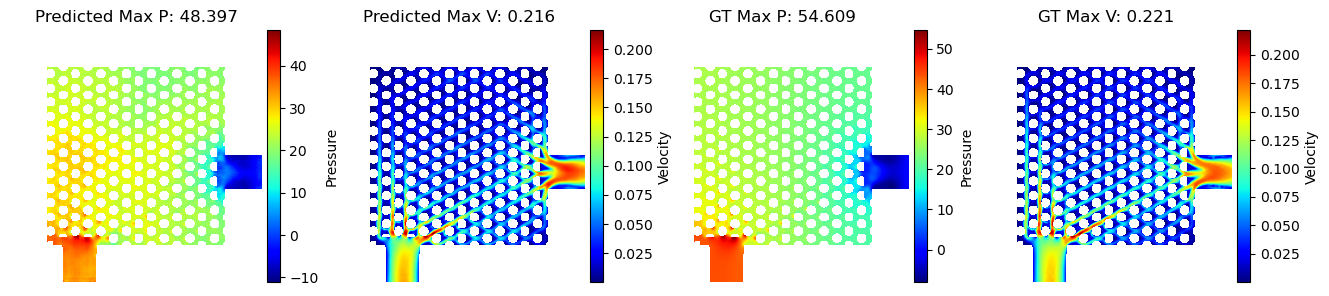

0
1000-bc_051_w_001_rn_001_inlet_top_outlet_right.npy


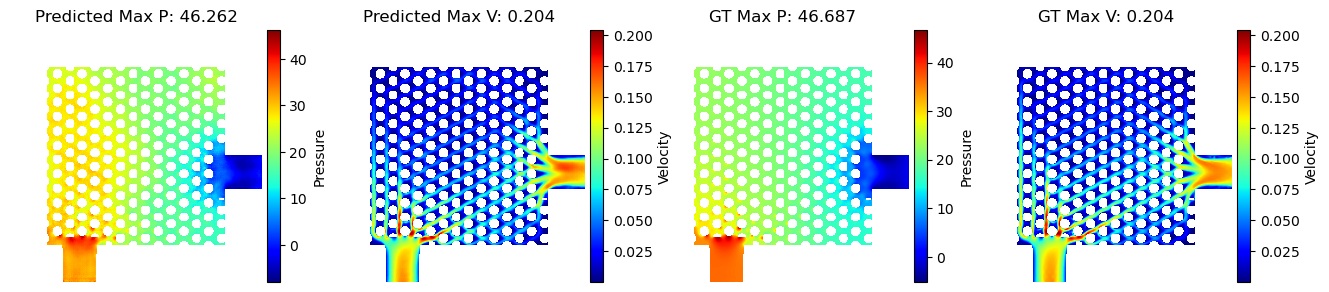

1
1000-bc_051_w_001_rn_002_inlet_top_outlet_right.npy


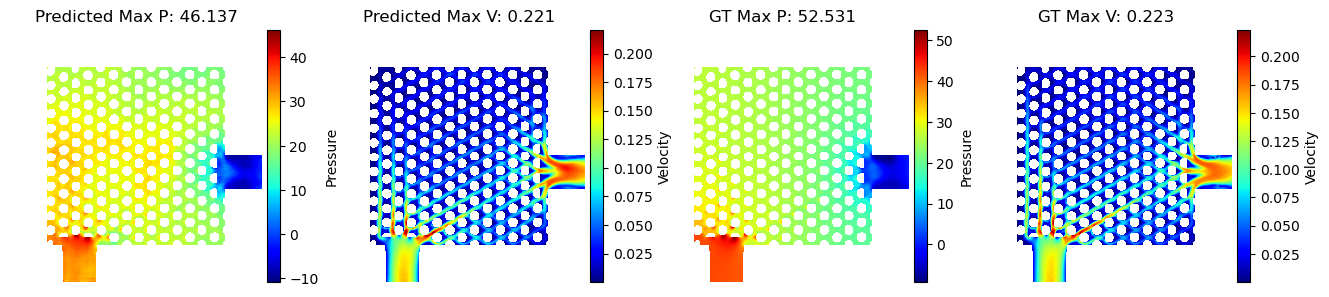

2
1000-bc_051_w_001_rn_003_inlet_top_outlet_right.npy


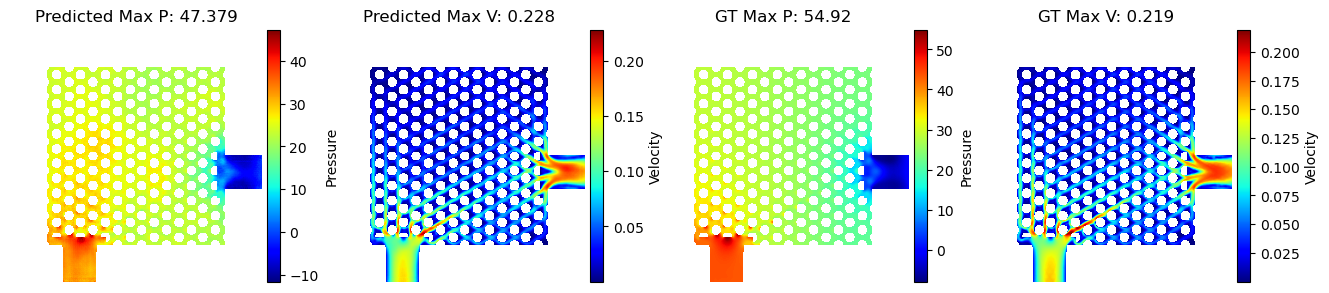

3
1000-bc_051_w_001_rn_004_inlet_top_outlet_right.npy


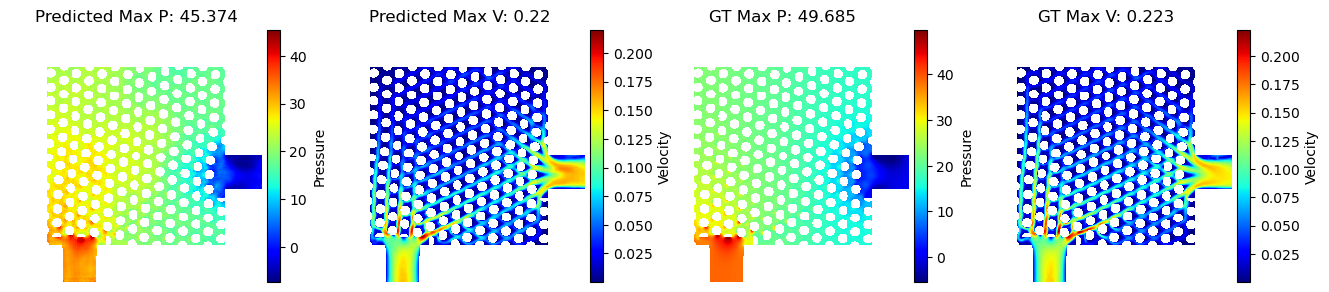

4
1000-bc_051_w_001_rn_005_inlet_top_outlet_right.npy


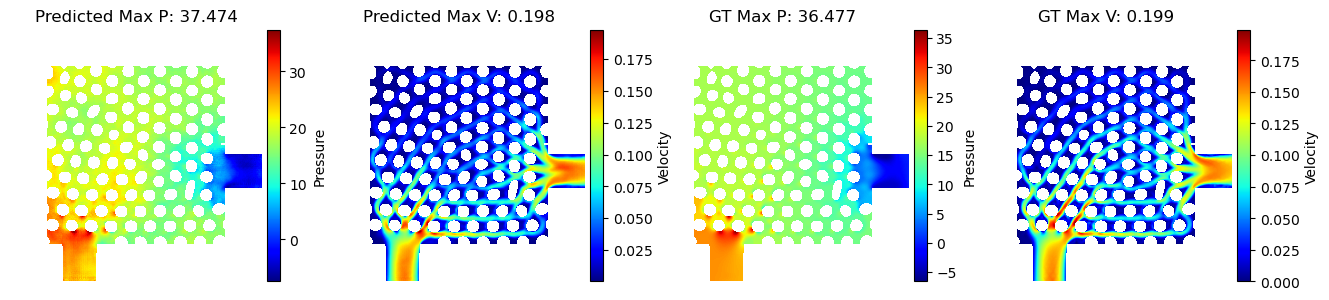

5
1000-bc_051_w_002_rn_001_inlet_top_outlet_right.npy


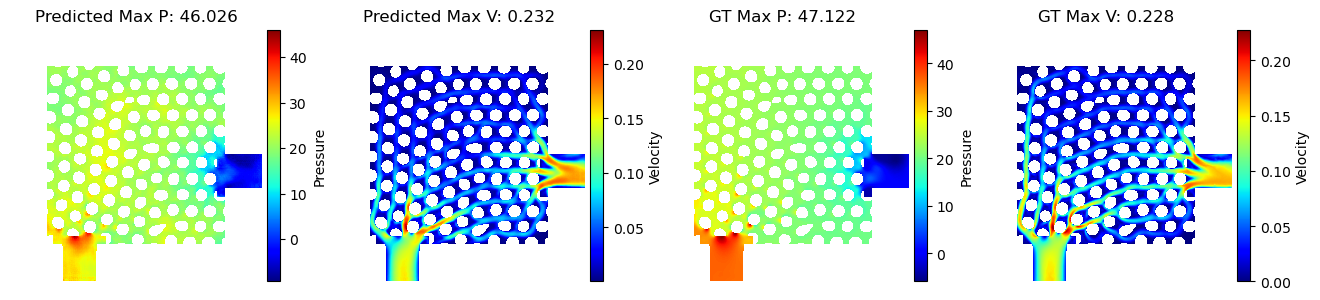

6
1000-bc_051_w_002_rn_002_inlet_top_outlet_right.npy


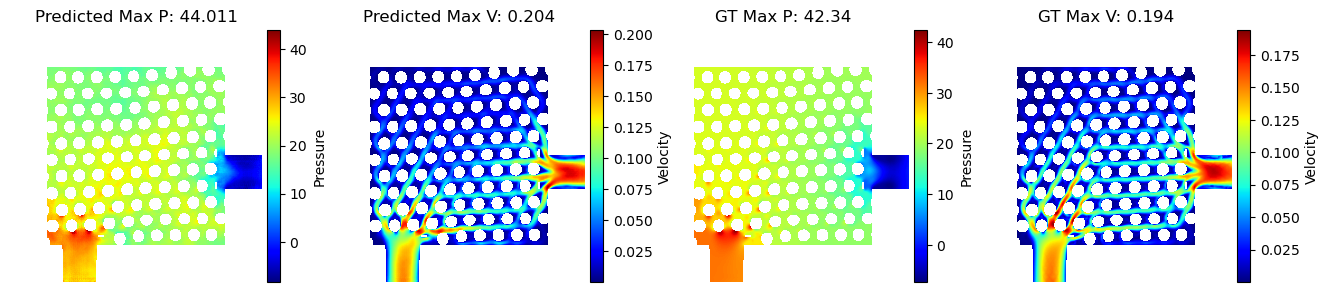

7
1000-bc_051_w_002_rn_003_inlet_top_outlet_right.npy


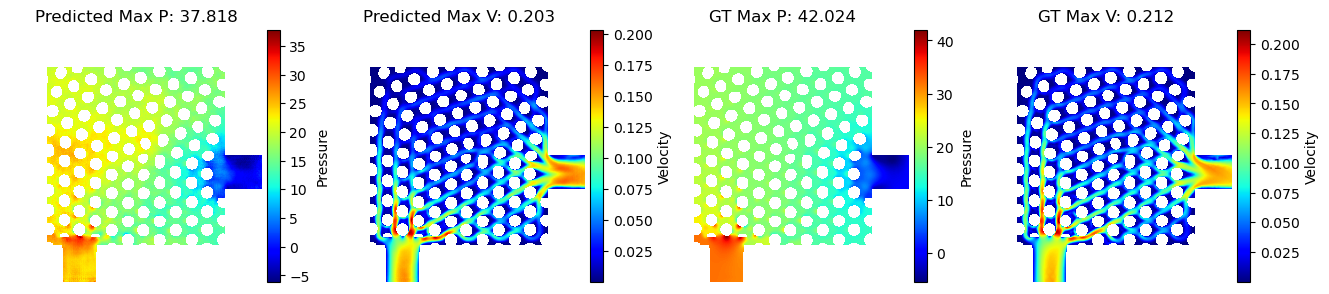

8
1000-bc_051_w_002_rn_004_inlet_top_outlet_right.npy


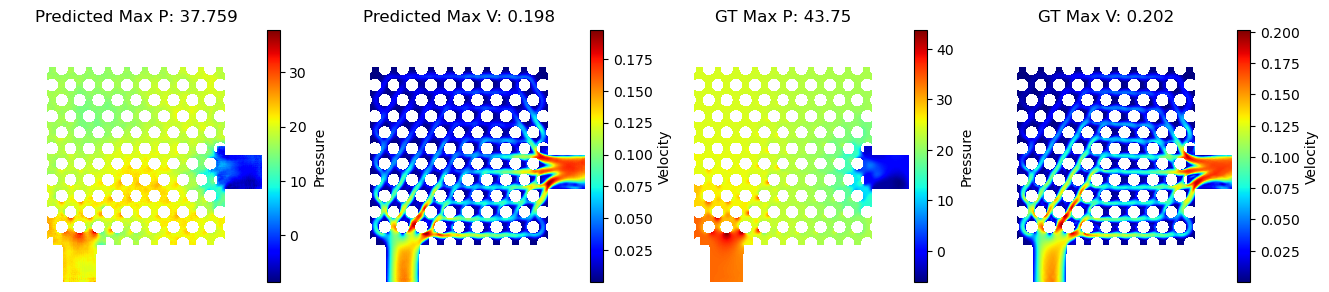

9
1000-bc_051_w_002_rn_005_inlet_top_outlet_right.npy


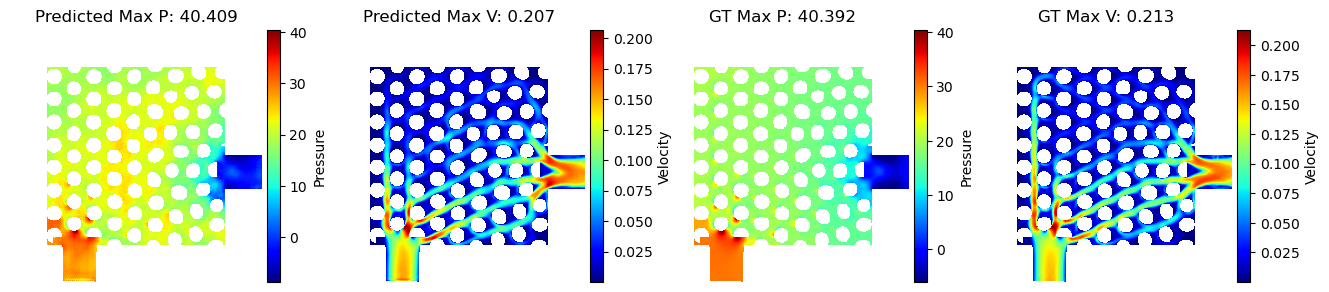

10
1000-bc_051_w_003_rn_001_inlet_top_outlet_right.npy


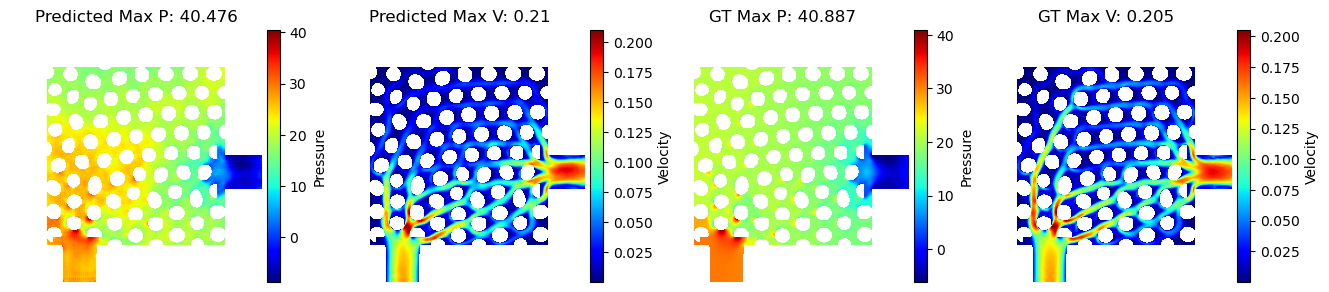

11
1000-bc_051_w_003_rn_002_inlet_top_outlet_right.npy


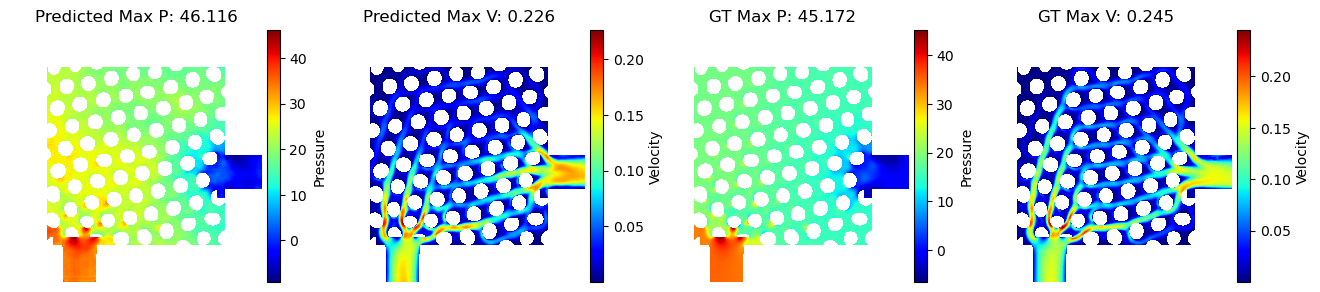

12
1000-bc_051_w_003_rn_003_inlet_top_outlet_right.npy


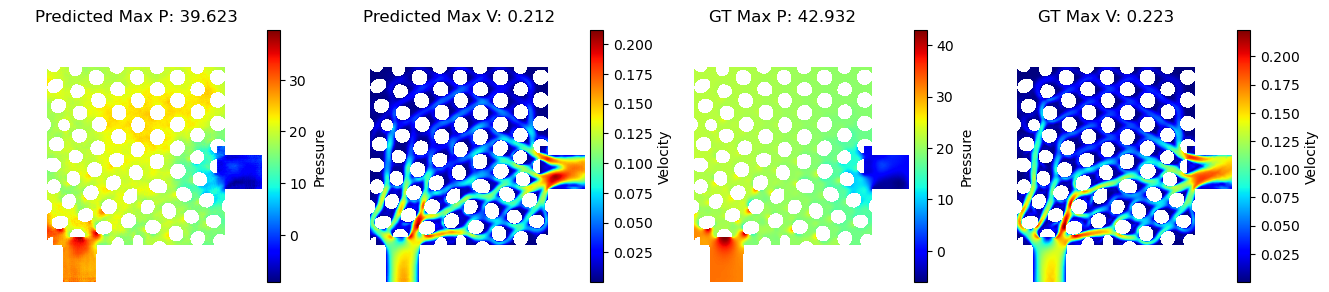

13
1000-bc_051_w_003_rn_004_inlet_top_outlet_right.npy


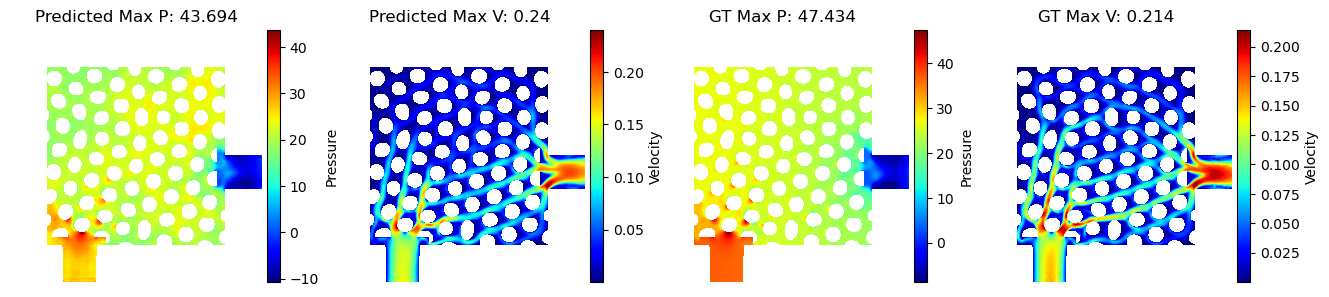

14
1000-bc_051_w_003_rn_005_inlet_top_outlet_right.npy


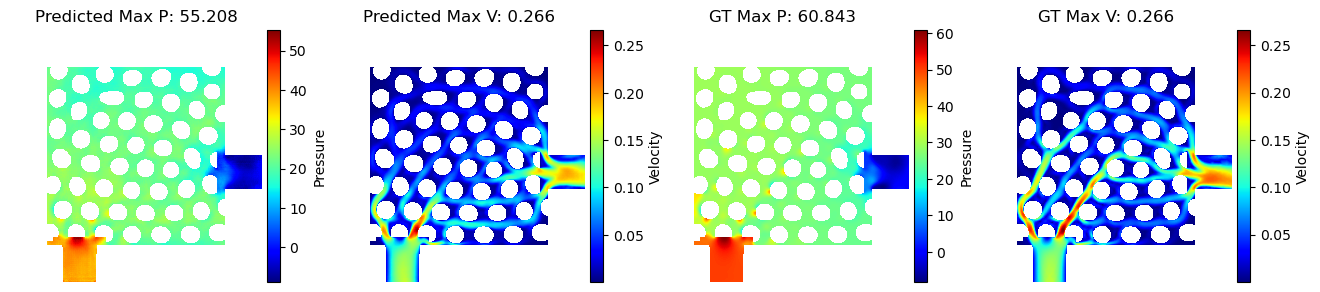

15
1000-bc_051_w_004_rn_001_inlet_top_outlet_right.npy


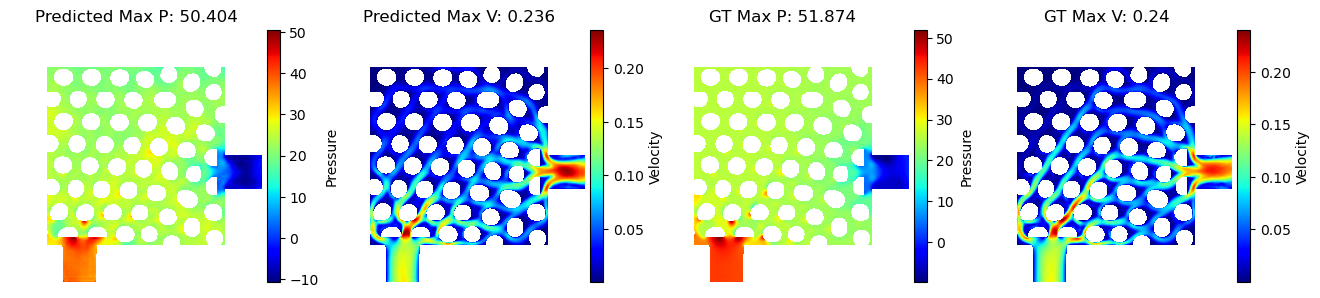

16
1000-bc_051_w_004_rn_002_inlet_top_outlet_right.npy


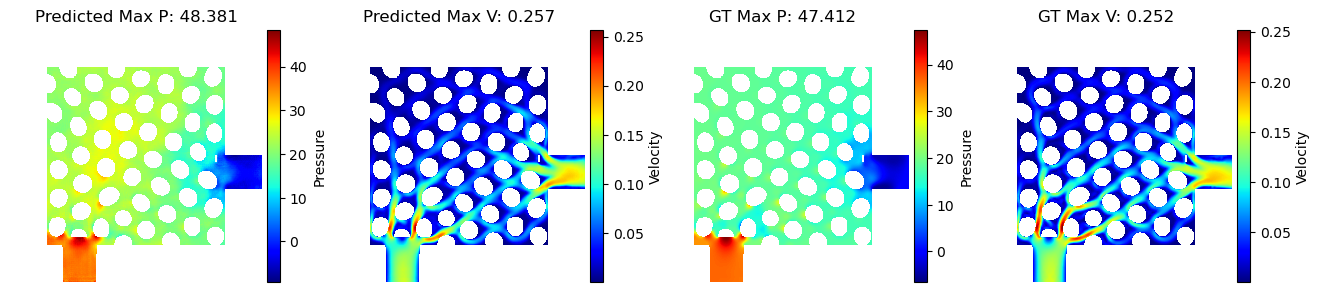

17
1000-bc_051_w_004_rn_003_inlet_top_outlet_right.npy


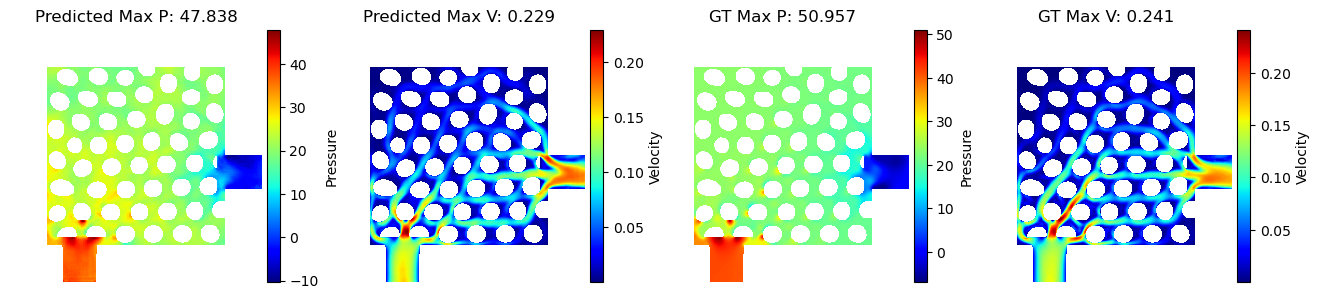

18
1000-bc_051_w_004_rn_004_inlet_top_outlet_right.npy


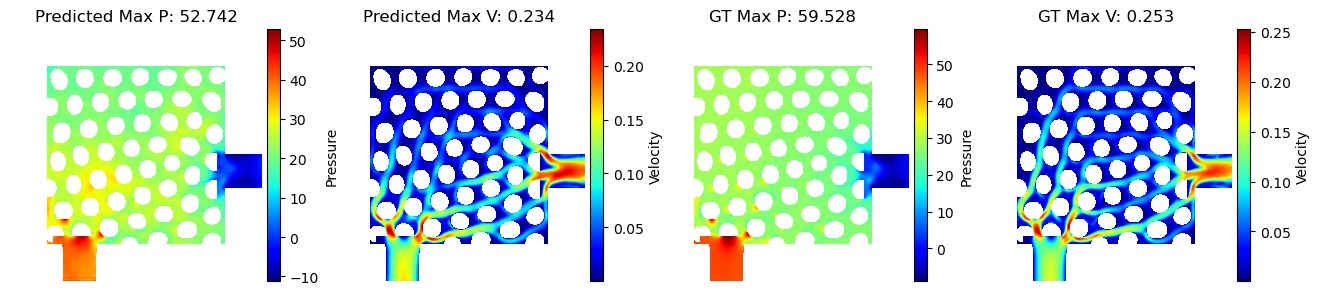

19
1000-bc_051_w_004_rn_005_inlet_top_outlet_right.npy


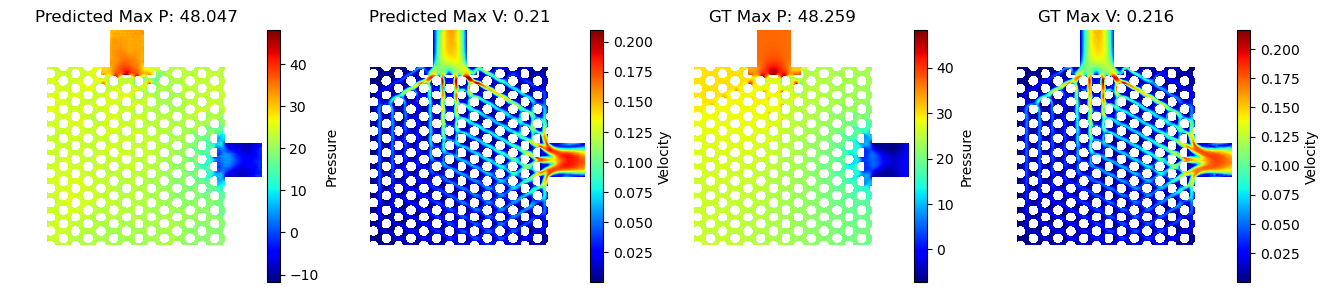

20
1000-bc_052_w_001_rn_001_inlet_bottom_outlet_right.npy


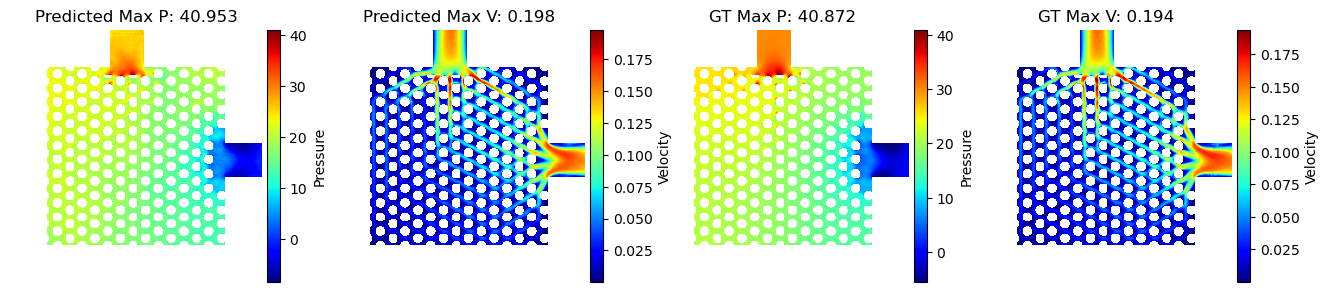

21
1000-bc_052_w_001_rn_002_inlet_bottom_outlet_right.npy


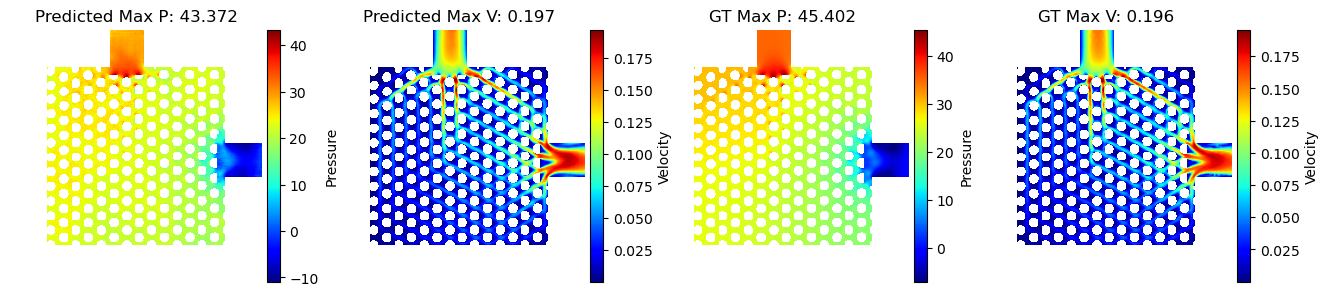

22
1000-bc_052_w_001_rn_003_inlet_bottom_outlet_right.npy


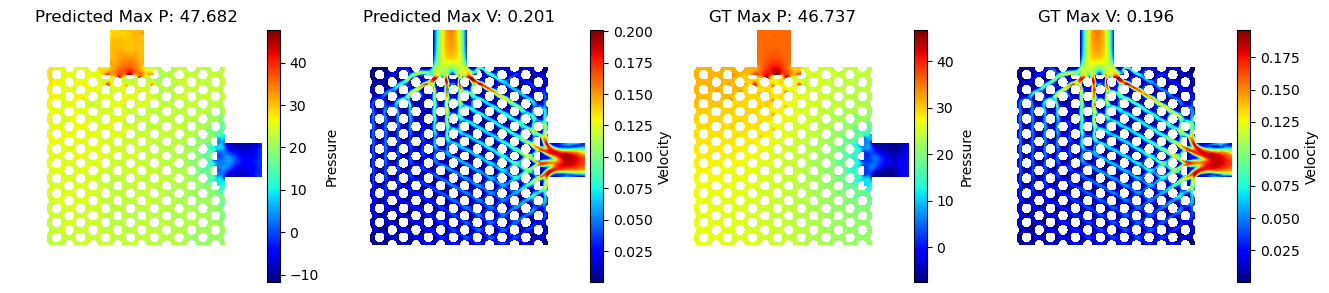

23
1000-bc_052_w_001_rn_004_inlet_bottom_outlet_right.npy


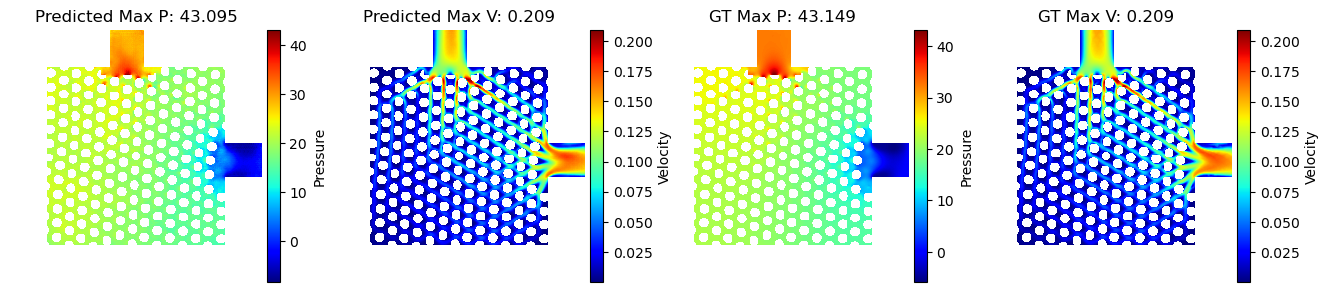

24
1000-bc_052_w_001_rn_005_inlet_bottom_outlet_right.npy


In [2]:
import matplotlib.pyplot as plt

lv2_folder = 'Validation/Low/LVV-new'
hv2_folder = 'Validation/High/HVV'
lp2_folder = 'Validation/Low/LPP-new'
hp2_folder = 'Validation/High/HPP'
lg2_folder = 'Validation/LG-3C'

# Get the list of file names in each folder
lv2_files = [f2 for f2 in os.listdir(lv2_folder) if f2 != ".ipynb_checkpoints"]
hv2_files = [f2 for f2 in os.listdir(hv2_folder) if f2 != ".ipynb_checkpoints"]
lp2_files = [f2 for f2 in os.listdir(lp2_folder) if f2 != ".ipynb_checkpoints"]
hp2_files = [f2 for f2 in os.listdir(hp2_folder) if f2 != ".ipynb_checkpoints"]
lg2_files = [f2 for f2 in os.listdir(lg2_folder) if f2 != ".ipynb_checkpoints"]

# Sort the file names to ensure the order is consistent
lv2_files.sort()
hv2_files.sort()
lp2_files.sort()
hp2_files.sort()
lg2_files.sort()



# Create empty lists to store the data
X_lv2 = []
X_lp2 = []
X_lg2 = []
Y_hv2 = []
Y_hp2 = []

# Read the data from the folders
for lv2_file, hv2_file,lp2_file,hp2_file,lg2_file in zip(lv2_files, hv2_files,lp2_files,hp2_files,lg2_files):
    try:
        
        # Read the LFV
        lv2_image = np.load(os.path.join(lv2_folder, lv2_file))  # Convert to RGB
        X_lv2.append(np.array(lv2_image))
        
        # Read the HFV
        hv2_image = np.load(os.path.join(hv2_folder, hv2_file))  # Convert to RGB
        Y_hv2.append(np.array(hv2_image))

        # Read the LFP
        lp2_image = np.load(os.path.join(lp2_folder, lp2_file))  # Convert to RGB
        X_lp2.append(np.array(lp2_image))
    
    
        # Read the channel geometry image
        lg2_image = Image.open(os.path.join(lg2_folder, lg2_file)).convert('RGB')  # Convert to RGB
        lg2_image = lg2_image.resize(input_shape[:2])  # Resize the image
        X_lg2.append(np.array(lg2_image))
    
        # Read the HFP
        hp2_image = np.load(os.path.join(hp2_folder, hp2_file))  # Convert to RGB
        Y_hp2.append(np.array(hp2_image))
    except:
        print('')

# Convert the lists to arrays
X_lv2 = np.array(X_lv2) 
X_lp2 = np.array(X_lp2) 
X_lg2 = np.array(X_lg2) / 255.0  # Normalize the channel geometry images
Y_hv2 = np.array(Y_hv2)
Y_hp2 = np.array(Y_hp2)





X_lp2 = np.nan_to_num(X_lp2, nan=0)
X_lv2 = np.nan_to_num(X_lv2, nan=0)
X_lp2=(X_lp2-np.min(X_lp2))/(np.max(X_lp2)-np.min(X_lp2))
# Predict velocity and pressure outputs
model.load_weights('Saved_Models_Temp/Final-Data-proposed-3-Inputs.h5')
pressure_output2,velocity_output2 = model.predict([X_lg2,X_lv2,X_lp2])

velocity_output2=(velocity_output2)
a=(np.max(Y_hp)-np.min(Y_hp))
b=(np.min(Y_hp))

pressure_output2=(pressure_output2*a)+b



mask = np.all(X_lg2 > 0.8, axis=-1)

# Expand mask to match the shape of array2
mask_expanded = np.repeat(mask[:, :, np.newaxis], 3, axis=2)
Y_hp2[mask]=np.nan
Y_hv2[mask]=np.nan
velocity_output2[mask]=np.nan
pressure_output2[mask]=np.nan

from mpl_toolkits.axes_grid1 import make_axes_locatable

# Assuming pressure_output, velocity_output, Y_hp, and Y_hv are defined and loaded elsewhere




def plot_images(index):
    plt.figure(figsize=(16, 48))

    # Display the pressure output
    ax1 = plt.subplot(1, 4, 1)
    im1 = ax1.imshow(pressure_output2[index],cmap='jet')
    divider1 = make_axes_locatable(ax1)
    cax1 = divider1.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im1, cax=cax1, label='Pressure')
    ax1.set_title('Predicted Max P: '+ str(np.round(np.nanmax(pressure_output2[index]),decimals=3)))
    ax1.axis("off")

    # Display the velocity output
    ax2 = plt.subplot(1, 4, 2)
    im2 = ax2.imshow(velocity_output2[index],cmap='jet')
    divider2 = make_axes_locatable(ax2)
    cax2 = divider2.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im2, cax=cax2, label='Velocity')
    ax2.set_title('Predicted Max V: '+ str(np.round(np.nanmax(velocity_output2[index]),decimals=3)))
    ax2.axis("off")

    # Display the input image (Pressure GT)
    ax3 = plt.subplot(1, 4, 3)
    im3 = ax3.imshow(Y_hp2[index],cmap='jet')
    divider3 = make_axes_locatable(ax3)
    cax3 = divider3.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im3, cax=cax3, label='Pressure')
    ax3.set_title('GT Max P: '+ str(np.round(np.nanmax(Y_hp2[index]),decimals=3)))
    ax3.axis("off")

    # Display the velocity GT
    ax4 = plt.subplot(1, 4, 4)
    im4 = ax4.imshow(Y_hv2[index],cmap='jet')
    divider4 = make_axes_locatable(ax4)
    cax4 = divider4.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im4, cax=cax4, label='Velocity')
    ax4.set_title('GT Max V: '+ str(np.round(np.nanmax(Y_hv2[index]),decimals=3)))
    ax4.axis("off")

    plt.show()

# Loop to plot images. You can change the number
for i in range(0, 25):
    plot_images(i)
    print(i)
    print(lv2_files[i])

In [5]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
from scipy.stats import pearsonr


Yp = np.expand_dims(Y_hp2, axis=-1)
Yv = np.expand_dims(Y_hv2, axis=-1)

expected = Yp
predicted = pressure_output2

# Mean Squared Error (MSE)
mse = np.nanmean((expected - predicted) ** 2)

# Mean Absolute Error (MAE)
mae = np.nanmean(np.abs(expected - predicted))

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Coefficient of Determination (R^2)
ss_tot = np.nanmean((expected - np.nanmean(expected)) ** 2)
ss_res = np.nanmean((expected - predicted) ** 2)
r2 = 1 - (ss_res / ss_tot)

# Normalized Root Mean Squared Error (NRMSE)
nrmse = rmse / (np.nanmax(expected) - np.nanmin(expected))

# Relative Error (RE)
relative_error = np.abs(expected - predicted) / np.abs(expected)
re = np.nanmean(relative_error)

# Symmetric Mean Absolute Percentage Error (SMAPE)
smape = 100 * np.nanmean(2 * np.abs(expected - predicted) / (np.abs(expected) + np.abs(predicted)))

# Pearson Correlation Coefficient (r)
expected_flattened = expected.flatten()
predicted_flattened = predicted.flatten()
valid_mask = ~np.isnan(expected_flattened) & ~np.isnan(predicted_flattened)
expected_valid = expected_flattened[valid_mask]
predicted_valid = predicted_flattened[valid_mask]
pearson_corr = np.corrcoef(expected_valid, predicted_valid)[0, 1]



# Peak Signal-to-Noise Ratio (PSNR)
psnr = 10 * np.log10(np.nanmax(expected) ** 2 / mse)

# Print Results
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2: {r2:.4f}")
print(f"NRMSE: {nrmse:.4f}")
print(f"Relative Error: {re:.4f}")
print(f"SMAPE: {smape:.4f}%")
print(f"Pearson Correlation: {pearson_corr:.4f}")
print(f"PSNR: {psnr:.4f} dB")



MSE: 132.4633
MAE: 4.9341
RMSE: 11.5093
R^2: 0.7641
NRMSE: 0.0200
Relative Error: 1.2492
SMAPE: 24.8488%
Pearson Correlation: 0.8841
PSNR: 33.0880 dB


In [6]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
from scipy.stats import pearsonr

# Dummy data (replace with actual predicted and expected arrays)
expected = Yv
predicted = velocity_output2

# Mean Squared Error (MSE)
mse = np.nanmean((expected - predicted) ** 2)

# Mean Absolute Error (MAE)
mae = np.nanmean(np.abs(expected - predicted))

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Coefficient of Determination (R^2)
ss_tot = np.nanmean((expected - np.nanmean(expected)) ** 2)
ss_res = np.nanmean((expected - predicted) ** 2)
r2 = 1 - (ss_res / ss_tot)

# Normalized Root Mean Squared Error (NRMSE)
nrmse = rmse / (np.nanmax(expected) - np.nanmin(expected))

# Relative Error (RE)
relative_error = np.abs(expected - predicted) / np.abs(expected)
re = np.nanmean(relative_error)

# Symmetric Mean Absolute Percentage Error (SMAPE)
smape = 100 * np.nanmean(2 * np.abs(expected - predicted) / (np.abs(expected) + np.abs(predicted)))

# Pearson Correlation Coefficient (r)
expected_flattened = expected.flatten()
predicted_flattened = predicted.flatten()
valid_mask = ~np.isnan(expected_flattened) & ~np.isnan(predicted_flattened)
expected_valid = expected_flattened[valid_mask]
predicted_valid = predicted_flattened[valid_mask]
pearson_corr = np.corrcoef(expected_valid, predicted_valid)[0, 1]



# Peak Signal-to-Noise Ratio (PSNR)
psnr = 10 * np.log10(np.nanmax(expected) ** 2 / mse)

# Print Results
print(f"MSE: {mse:.8f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2: {r2:.4f}")
print(f"NRMSE: {nrmse:.4f}")
print(f"Relative Error: {re:.4f}")
print(f"SMAPE: {smape:.4f}%")
print(f"Pearson Correlation: {pearson_corr:.4f}")
print(f"PSNR: {psnr:.4f} dB")



MSE: 0.00032640
MAE: 0.0095
RMSE: 0.0181
R^2: 0.8918
NRMSE: 0.0198
Relative Error: 250135234.3680
SMAPE: 40.5666%
Pearson Correlation: 0.9447
PSNR: 34.0633 dB


In [7]:
path1="Results_Temp/Data/Proposed"
os.makedirs(path1, exist_ok=True)
np.save(path1+"/velocity_predicted.npy",velocity_output2)
np.save(path1+"/pressure_predicted.npy",pressure_output2)
